# Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below. 

Downlaod Files:
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [167]:
#importing the required libraries

import pandas as pd
import numpy as np

In [168]:
#loading the dataset from github
pow=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
pow

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
#first 5 rows
pow.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [170]:
#last 5 rows
pow.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
#sample
pow.sample()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
178,IND,India,DIMBE,IND0000102,5.0,NaN,NaN,Hydro,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
#the names of the columns in teh dataset
pow.columns


Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

About the columns


Key attributes of the database

The database includes the following indicators:

-country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

-country_long` (text): longer form of the country designation

-name (text): name or title of the power plant, generally in Romanized form

-gppd_idnr (text): 10 or 12 character identifier for the power plant

-capacity_mw (number): electrical generating capacity in megawatts

-latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

-longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

-primary_fuel (text): energy source used in primary electricity generation or export

-other_fuel1 (text): energy source used in electricity generation or export

-other_fuel2 (text): energy source used in electricity generation or export

-other_fuel3 (text): energy source used in electricity generation or export

-commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

-owner (text): majority shareholder of the power plant, generally in Romanized form

-source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

-url (text): web document corresponding to the `source` field

-geolocation_source` (text): attribution for geolocation information

-wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

-year_of_capacity_data (number): year the capacity information was reported

-generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

-generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

-generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

-generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

-generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

-generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

-generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

-generation_data_source (text): attribution for the reported generation information

-estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
-estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 
-estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 

-estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 

-estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

-estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

-estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

-estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

-estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

-estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 



In [173]:
pow.shape

(907, 27)

In [174]:
#checking for nature of datatypes
pow.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [175]:
#Checking data info
pow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [176]:
#Checking data description for all numerical columns
pow.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


In [177]:
#Checking data description for all non-numerical columns

pow_str=pow[['country','country_long','name','gppd_idnr','primary_fuel','other_fuel1','other_fuel2','owner','source','url','geolocation_source','generation_data_source']]

pow.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


In [178]:
#Checking for null values
pow.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [179]:
#Checking for null values
pow.isnull().sum().sum()

10445

In [180]:
#Checking the content of each columns
pow['country'].value_counts()

IND    907
Name: country, dtype: int64

In [181]:
pow['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [182]:
pow['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [183]:
pow.name.nunique()

907

In [184]:
pow['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [185]:
pow.gppd_idnr.nunique()

907

In [186]:
pow.capacity_mw.value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [187]:
pow.capacity_mw.nunique()

361

In [188]:
pow.latitude.value_counts()

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64

In [189]:
pow.latitude.nunique()

836

In [190]:
pow.longitude.value_counts()

71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64

In [191]:
pow['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [192]:
pow['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [193]:
pow['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [194]:
pow['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [195]:
pow.commissioning_year.value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [196]:
pow['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [197]:
pow.owner.nunique()

280

In [198]:
pow['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [199]:
pow.source.nunique()

191

In [200]:
pow['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

In [201]:
pow.url.nunique()

304

In [202]:
pow['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [203]:
pow.geolocation_source.nunique()

3

In [204]:
pow['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [205]:
pow.wepp_id.value_counts()

Series([], Name: wepp_id, dtype: int64)

In [206]:
pow.year_of_capacity_data.value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [207]:
pow.generation_data_source.value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [208]:
pow.generation_data_source.nunique()

1

In [209]:
pow.estimated_generation_gwh.value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

Observations:
    
    The Dataset is made up of;
       907 rows and 27 columns
       25 features and 2 Targets- 1) Primary Fuel 2) capacity_mw
    
    Description of Features:
        
        country :
        It is made up of Categorical data
        It has 907 factors; IND
        It has no null values
        Its Datatype is an Object type

        country_long  :
        It is made up of Categorical data
        It has 907 factors; India
        It has no null values
        Its Datatype is an Object type

        name  :
        It is made up of Categorical data
        It has 907 factors; ACME Solar Tower,RAICHUR  ETC
        It has no null values
        Its Datatype is an Object type
        
        gppd_idnr :
        It is made up of Categorical data
        It has 907 factors; WRI1020239,IND0000356, etc
        It has no null values
        Its Datatype is an Object type
        
        capacity_mw :(TARGET)
        It is made up of floating data
        It has 907 factors.
        It has no null values
        Its Datatype is an float type
        
        latitude :
        It is made up of floating data
        It has 836 factors.
        It has 46 null values
        Its Datatype is an float type
        
        latitude :
        It is made up of floating data
        It has 827 factors.
        It has 46 null values
        Its Datatype is an float type
        
        primary_fuel :(TARGET)
        It is made up of int data
        It has 907 factors.Coal-258, Hydro-251, Solar-127, Wind-123, Gas-69, Biomass-50,Oil-20,
        Nuclear-9
        It has no null values
        Its Datatype is an int type
        
        other_fuel1  :
        It is made up of str data
        It has 1 factor-Oil
        It has 709 null values
        Its Datatype is an object type
        
        other_fuel2  :
        It is made up of str data
        It has 906 null values
        Its Datatype is an object type
        
        other_fuel3  :
        It is made up of floating data
        It has 907 null values
        Its Datatype is an float type
        
        commissioning_year  :
        It is made up of integer data
        It has 380 null values
        Its Datatype is an int type
        
        owner
        It is made up of str data
        It has 280 factor-Acc Acc ltd,terling Agro Industries ltd., etc
        It has 565 null values
        Its Datatype is an object type
        
        source
        It is made up of str data
        It has 194 factor-Central Electricity Authority, etc
        It has no null values
        Its Datatype is an object type
        
        url:
        It is made up of str data
        It has 304 factors.
        It has no null values
        Its Datatype is an int type
        
        geolocation_source:
        It is made up of str data
        It has 3 factors.-WRI,Industry About & National Renewable Energy Laboratory 
        It has 19 null values
        Its Datatype is an object type
        
        wepp_id:
        It is made up of float data
        It has 907 null values
        Its Datatype is an float type 
        
        
        year_of_capacity_data:
        It is made up of float data
        It has 388 null values
        Its Datatype is an float type 
        
        generation_gwh_2013:
        It is made up of float data
        It has null values
        Its Datatype is an float type 
        
        generation_gwh_2014       
        It is made up of float data
        It has null values
        Its Datatype is an float type 
        
        generation_gwh_2015:
        It is made up of float data
        It has null values
        Its Datatype is an float type
        
        generation_gwh_2016:
        It is made up of float data
        It has null values
        Its Datatype is an float type
        
        generation_gwh_2017:
        It is made up of float data
        It has null values
        Its Datatype is an float type
        
        generation_gwh_2018:
        It is made up of float data
        It has null values
        Its Datatype is an float type
        
        generation_gwh_2019:
        It is made up of float data
        It has null values
        Its Datatype is an float type
        
        generation_data_source:
        It is made up of object data
        It has null values
        It has 1 factor-Central Electricity Authority 
        Its Datatype is an object type
        
        estimated_generation_gwh
        It is made up of object data
        It has null values
        Its Datatype is an object type
        
        

EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION

Count Distribution of Categorical Data - Univariate Analysis

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


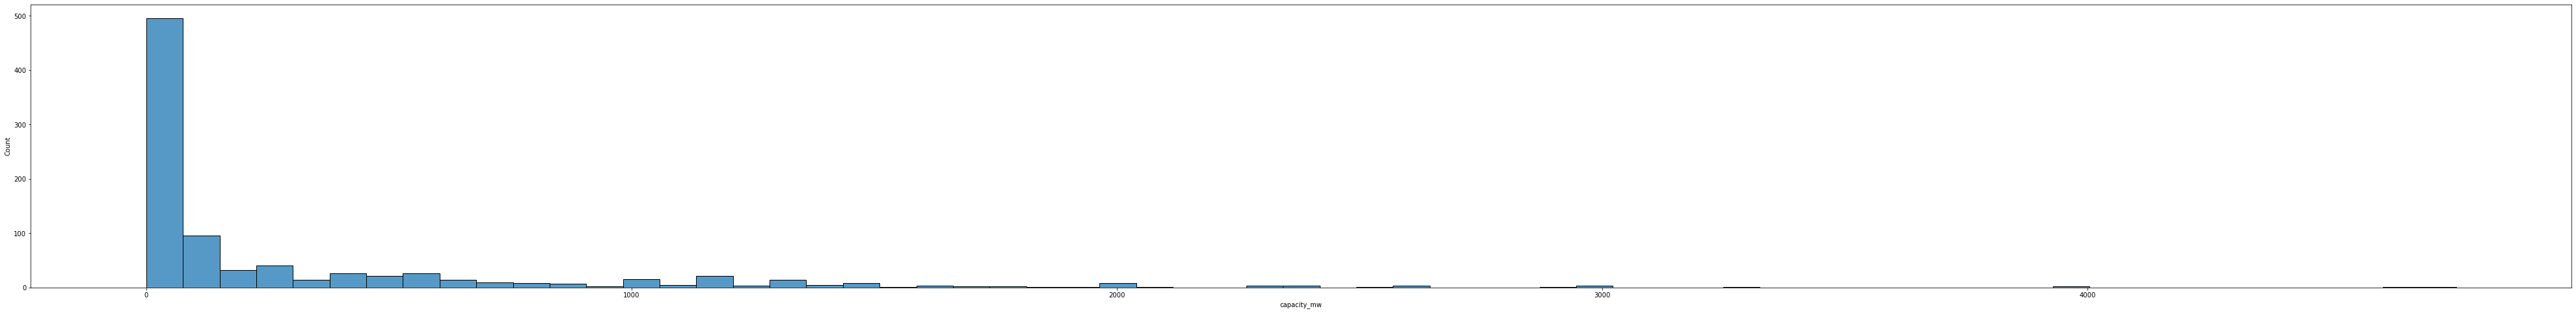

In [211]:

plt.figure(figsize=(70,8))
ax=sns.histplot(x='capacity_mw',data=pow)
print(pow['capacity_mw'].value_counts())


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Solar'),
  Text(1, 0, 'Coal'),
  Text(2, 0, 'Wind'),
  Text(3, 0, 'Gas'),
  Text(4, 0, 'Hydro'),
  Text(5, 0, 'Biomass'),
  Text(6, 0, 'Oil'),
  Text(7, 0, 'Nuclear')])

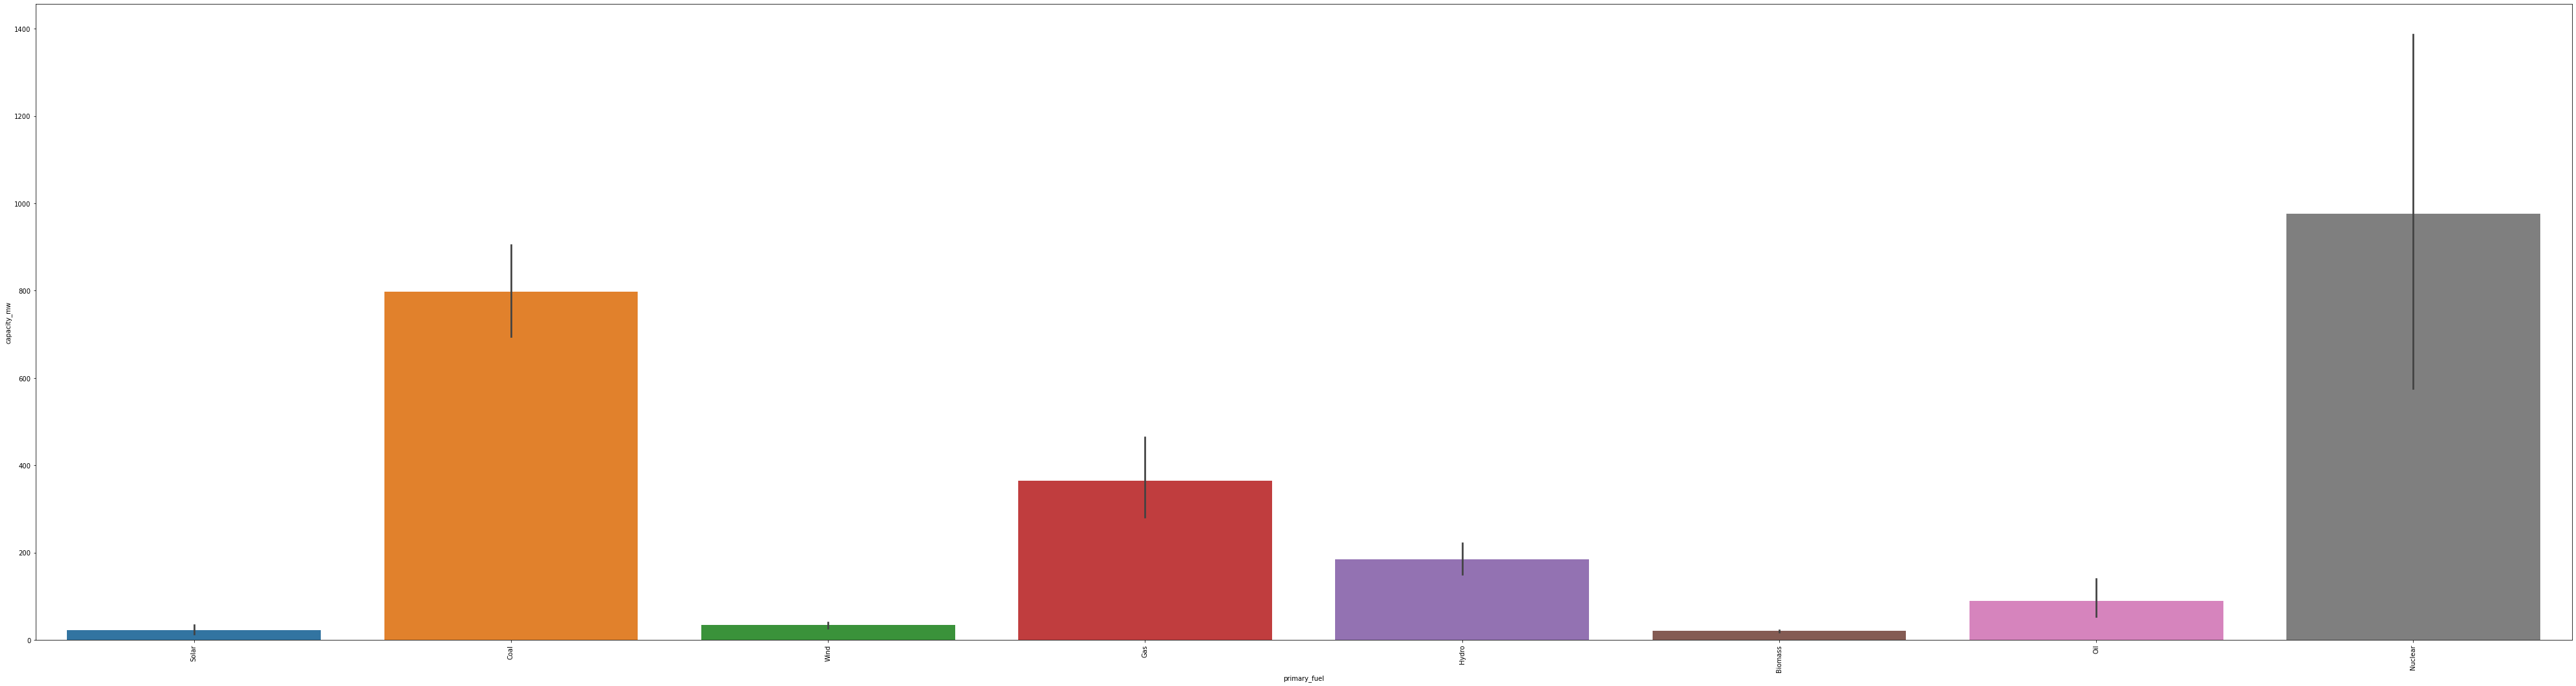

In [212]:
plt.figure(figsize=(70,18))
sns.barplot(y='capacity_mw', x='primary_fuel', data= pow)
pow['primary_fuel'].value_counts()
plt.xticks(rotation=90)

Observation:
    The major capacity generating power is Nuclear, followed by coal.
    

In [213]:

#Capacity Ranknig of the Power Plants

pow_cap=pow[['name','capacity_mw','primary_fuel']]
pow_cap=pow_cap.sort_values('capacity_mw',ascending=False)
pow_cap

,name,capacity_mw,primary_fuel
880,VINDH_CHAL STPS,4760.0,Coal
493,MUNDRA TPP,4620.0,Coal
494,MUNDRA UMPP,4000.0,Coal
695,SASAN UMPP,3960.0,Coal
808,TIRORA TPP,3300.0,Coal
...,...,...,...
438,Lallian Kalan Solar Power Plant,1.0,Solar
243,Gandhinagar Solar Power Plant,1.0,Solar
441,Lathi Solar Power Plant,1.0,Solar
122,Belagau Wind Farm,1.0,Wind


In [214]:
#Capacity Ranknig of Coal Power Plant

pow_cap=pow[['name','capacity_mw',]][pow['primary_fuel']=='Coal']
pow_cap=pow_cap.sort_values('capacity_mw',ascending=False)
pow_cap

,name,capacity_mw
880,VINDH_CHAL STPS,4760.0
493,MUNDRA TPP,4620.0
494,MUNDRA UMPP,4000.0
695,SASAN UMPP,3960.0
808,TIRORA TPP,3300.0
...,...,...
539,NITIN PLANT,10.5
141,CHANDRAPUR MANIKGHAR,10.0
73,BELLARY HOTHUR,10.0
48,BAMANIA CEMENT,10.0


In [215]:
#Capacity Ranknig of Nuclear Power Plant

pow_cap=pow[['name','capacity_mw',]][pow['primary_fuel']=='Nuclear']
pow_cap=pow_cap.sort_values('capacity_mw',ascending=False)
pow_cap

,name,capacity_mw
378,KUNDANKULAM,2000.0
414,Kudankulam,2000.0
792,TARAPUR,1400.0
618,R.A.P.S.,1080.0
309,KAIGA,880.0
312,KAKRAPARA,440.0
443,M.A.P.P.,440.0
510,N.A.P.S,440.0
160,DAE RAJASTHAN,100.0


Observation: The dataset has 9 nuclear power plants in India.

In [216]:
#Capacity Ranknig of Wind Power Plant

pow_cap=pow[['name','capacity_mw',]][pow['primary_fuel']=='Wind']
pow_cap=pow_cap.sort_values('capacity_mw',ascending=False)
pow_cap

,name,capacity_mw
834,Thimmapuram Wind Farm,200.0
557,NuPower Tirunelveli Wind Farm,150.0
126,Bera Wind Farm,150.0
192,Davangere Wind Farm,125.0
29,Andrha Lake Wind Farm,113.6
...,...,...
851,UPL Dharapuram Wind Farm,1.7
753,Sai Sulphonates Wind Mill,1.5
837,Tiruppur 2,1.5
836,Tiruppur,1.5


In [217]:
#Capacity Ranknig of Hydro Power Plant

pow_cap=pow[['name','capacity_mw',]][pow['primary_fuel']=='Hydro']
pow_cap=pow_cap.sort_values('capacity_mw',ascending=False)
pow_cap

,name,capacity_mw
373,KOYNA COMPLEX,1956.00
526,NATHPA JHAKRI,1500.00
78,BHAKRA,1379.00
676,S.SAROVAR RBPH,1200.00
799,TEESTA-III,1200.00
...,...,...
741,SURAT GARH,4.00
860,URUMI,3.75
325,KARGIL,3.75
145,CHEMBUKADAVU-II,3.75


In [218]:
#Capacity Ranknig of Biomass Power Plant

pow_cap=pow[['name','capacity_mw',]][pow['primary_fuel']=='Biomass']
pow_cap=pow_cap.sort_values('capacity_mw',ascending=False)
pow_cap

,name,capacity_mw
286,JAISALMER GODAWARI,50.00
710,SHIROL MILL,36.00
426,LOKMANGAL SUGAR ETHANOL,31.50
164,DAUND SUGAR,30.00
576,PARBHANI GANGAKHED,30.00
40,BAGALKOT ICP,28.00
819,TUNGABHADRA SUGAR,28.00
361,KOPPA SUGAR,26.00
347,KM DODDI SUGAR,26.00
692,SANKESHWAR MILL,26.00


In [219]:
#Capacity Ranknig of Hydro Power Plant

pow_cap=pow[['name','capacity_mw',]][pow['primary_fuel']=='Oil']
pow_cap=pow_cap.sort_values('capacity_mw',ascending=False)
pow_cap

,name,capacity_mw
813,TROMBAY,500.00
569,PAMPORE GT,175.00
817,TROMBAY_Oil,150.00
901,YELHANKA (DG),106.60
685,SAMAYANALLUR DG,106.00
684,SAMALPATTI DG,105.70
351,KOJIKODE DG,96.00
109,BUTIBORI PLANT,81.50
515,NAGOTHANE COMPLEX,78.90
181,DOLVI ISPAT,67.60


In [220]:

# we can drop both country & country_long as both columns have same data and has only 1 unique name.
pow.iloc[:,0:3]

,country,country_long,name
0,IND,India,ACME Solar Tower
1,IND,India,ADITYA CEMENT WORKS
2,IND,India,AES Saurashtra Windfarms
3,IND,India,AGARTALA GT
4,IND,India,AKALTARA TPP
...,...,...,...
902,IND,India,YERMARUS TPP
903,IND,India,Yelesandra Solar Power Plant
904,IND,India,Yelisirur wind power project
905,IND,India,ZAWAR MINES


In [221]:
pow['country'].nunique()

1

In [222]:
pow.url

0      http://www.nrel.gov/csp/solarpaces/project_det...
1                        http://www.ultratechcement.com/
2      https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...
3                                 http://www.cea.nic.in/
4                                 http://www.cea.nic.in/
                             ...                        
902                               http://www.cea.nic.in/
903                            http://karnatakapower.com
904    https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...
905                             http://www.hzlindia.com/
906    https://cdm.unfccc.int/Projects/DB/RWTUV134503...
Name: url, Length: 907, dtype: object

In [223]:
from collections import Counter

In [224]:
#Checking the content of each Categorical columns
print("The Value Counts in country - ",Counter(pow['country']))
print("The Value Counts in country_long - ",Counter(pow['country_long']))
print("The Value Counts in name - ",Counter(pow['name']))
print("The Value Counts in gppd_idnr - ",Counter(pow['gppd_idnr']))
print("The Value Counts in primary_fuel - ",Counter(pow['primary_fuel']))
print("The Value Counts in other_fuel1 - ",Counter(pow['other_fuel1']))
print("The Value Counts in other_fuel2 - ",Counter(pow['other_fuel2']))
print("The Value Counts in owner - ",Counter(pow['owner']))

print("The Value Counts in source - ",Counter(pow['source']))
print("The Value Counts in url - ",Counter(pow['url']))
print("The Value Counts in geolocation_source - ",Counter(pow['geolocation_source']))
print("The Value Counts in generation_data_source  - ",Counter(pow['generation_data_source ']))

The Value Counts in country -  Counter({'IND': 907})
The Value Counts in country_long -  Counter({'India': 907})
The Value Counts in name -  Counter({'ACME Solar Tower': 1, 'ADITYA CEMENT WORKS': 1, 'AES Saurashtra Windfarms': 1, 'AGARTALA GT': 1, 'AKALTARA TPP': 1, 'AKRIMOTA LIG': 1, 'ALIYAR': 1, 'ALLAIN DUHANGAN': 1, 'ALMATTI DAM': 1, 'AMAR KANTAK': 1, 'AMARAVATI TPP': 1, 'ANANDPUR SAHIB ST-I&II': 1, 'ANAPARA "C"': 1, 'ANDHRA': 1, 'ANOOPGARH ST I&II': 1, 'ANPARA': 1, 'ANTA GT': 1, 'ANUPPUR': 1, 'ANUPUR TPP': 1, 'ARVINDNAGAR SUGAR': 1, 'ASHOKNAGAR MILL': 1, 'ATHANI SUGAR': 1, 'AURAIYA GT': 1, 'AVANTHA BHANDAR TPP': 1, 'AWARPUR CEMENT PLANT': 1, 'Abhijeet': 1, 'Amarsar Solar Power Plant': 1, 'Anabura Wind Farm': 1, 'Ananthapur - Meil Solar Power Plant': 1, 'Andrha Lake Wind Farm': 1, 'Anikkadavu Wind Farm': 1, 'Arasinagundi Wind Farm': 1, 'Askandra - DREPL Solar Power Plant': 1, 'Askandra - Electromech Maritech Solar Power Plant': 1, 'Askandra - Finehope Solar Power Plant': 1, 'Askandr

KeyError: 'generation_data_source '

<AxesSubplot:xlabel='latitude', ylabel='primary_fuel'>

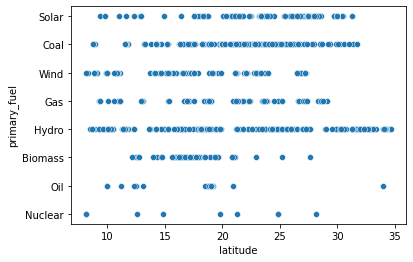

In [225]:
sns.scatterplot(data= pow, x='latitude', y='primary_fuel')

<AxesSubplot:xlabel='longitude', ylabel='primary_fuel'>

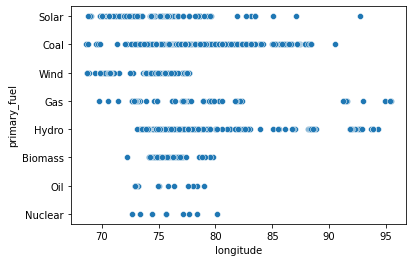

In [226]:
sns.scatterplot(data= pow, x='longitude', y='primary_fuel')

Observation: The variousLongitude on which the primary fuels source is located.

In [227]:
pow.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

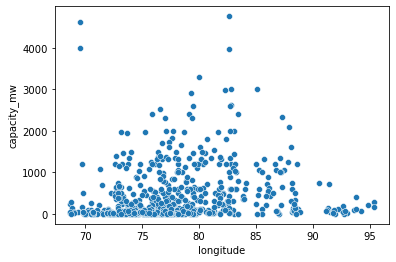

In [228]:
sns.scatterplot(data= pow, x='longitude', y='capacity_mw')

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

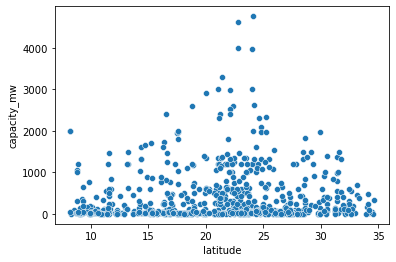

In [229]:
sns.scatterplot(data= pow, x='latitude', y='capacity_mw')

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

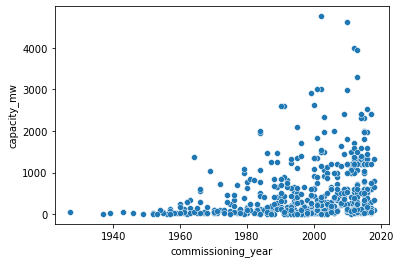

In [230]:
sns.scatterplot(data= pow, x='commissioning_year', y='capacity_mw')

Observation: Most of the plants started operations between 2000-2020. 

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

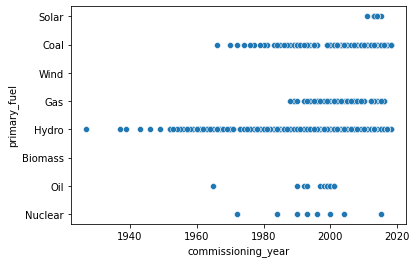

In [231]:
sns.scatterplot(data= pow, x='commissioning_year', y='primary_fuel')

Observation: Hydro plant was the very first primary fuel generating plant launched before 1940.

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

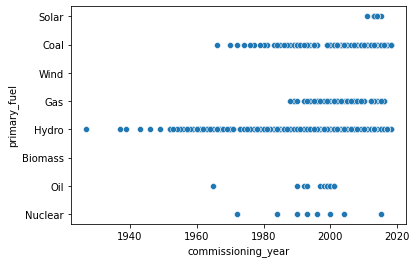

In [232]:
sns.scatterplot(data= pow, x='commissioning_year', y='primary_fuel')

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

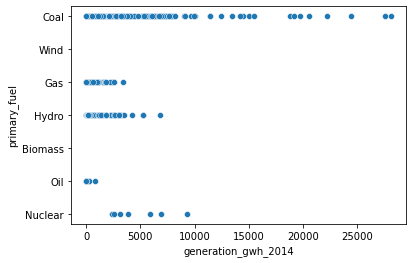

In [233]:
sns.scatterplot(x='generation_gwh_2014', y='primary_fuel', data=pow)

Observation: Maximum primary fuel geenration ws done through Coal.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='primary_fuel'>

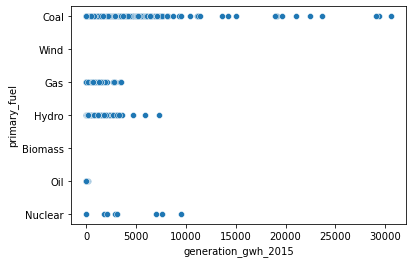

In [234]:
sns.scatterplot(x='generation_gwh_2015', y='primary_fuel', data=pow)

Observation:2015 also coal was the main source of primary fuel generation

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='primary_fuel'>

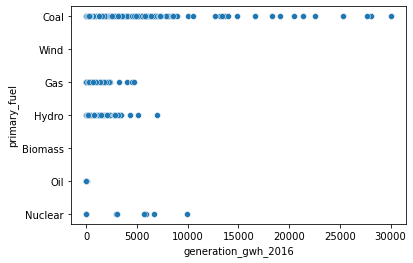

In [235]:
sns.scatterplot(x='generation_gwh_2016', y='primary_fuel', data=pow)

Observation:2016 also coal was the main source of primary fuel generation followed by nuclear.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='primary_fuel'>

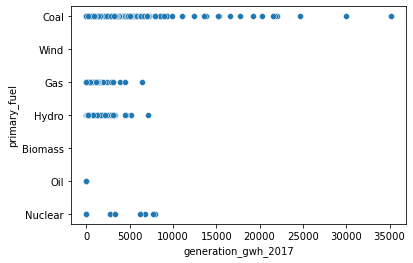

In [236]:
sns.scatterplot(x='generation_gwh_2017', y='primary_fuel', data=pow)

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='primary_fuel'>

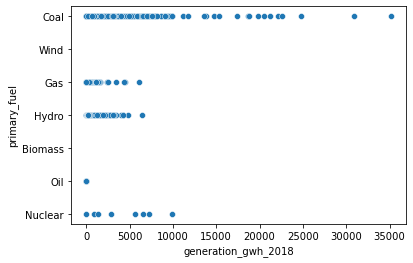

In [237]:
sns.scatterplot(x='generation_gwh_2018', y='primary_fuel', data=pow)

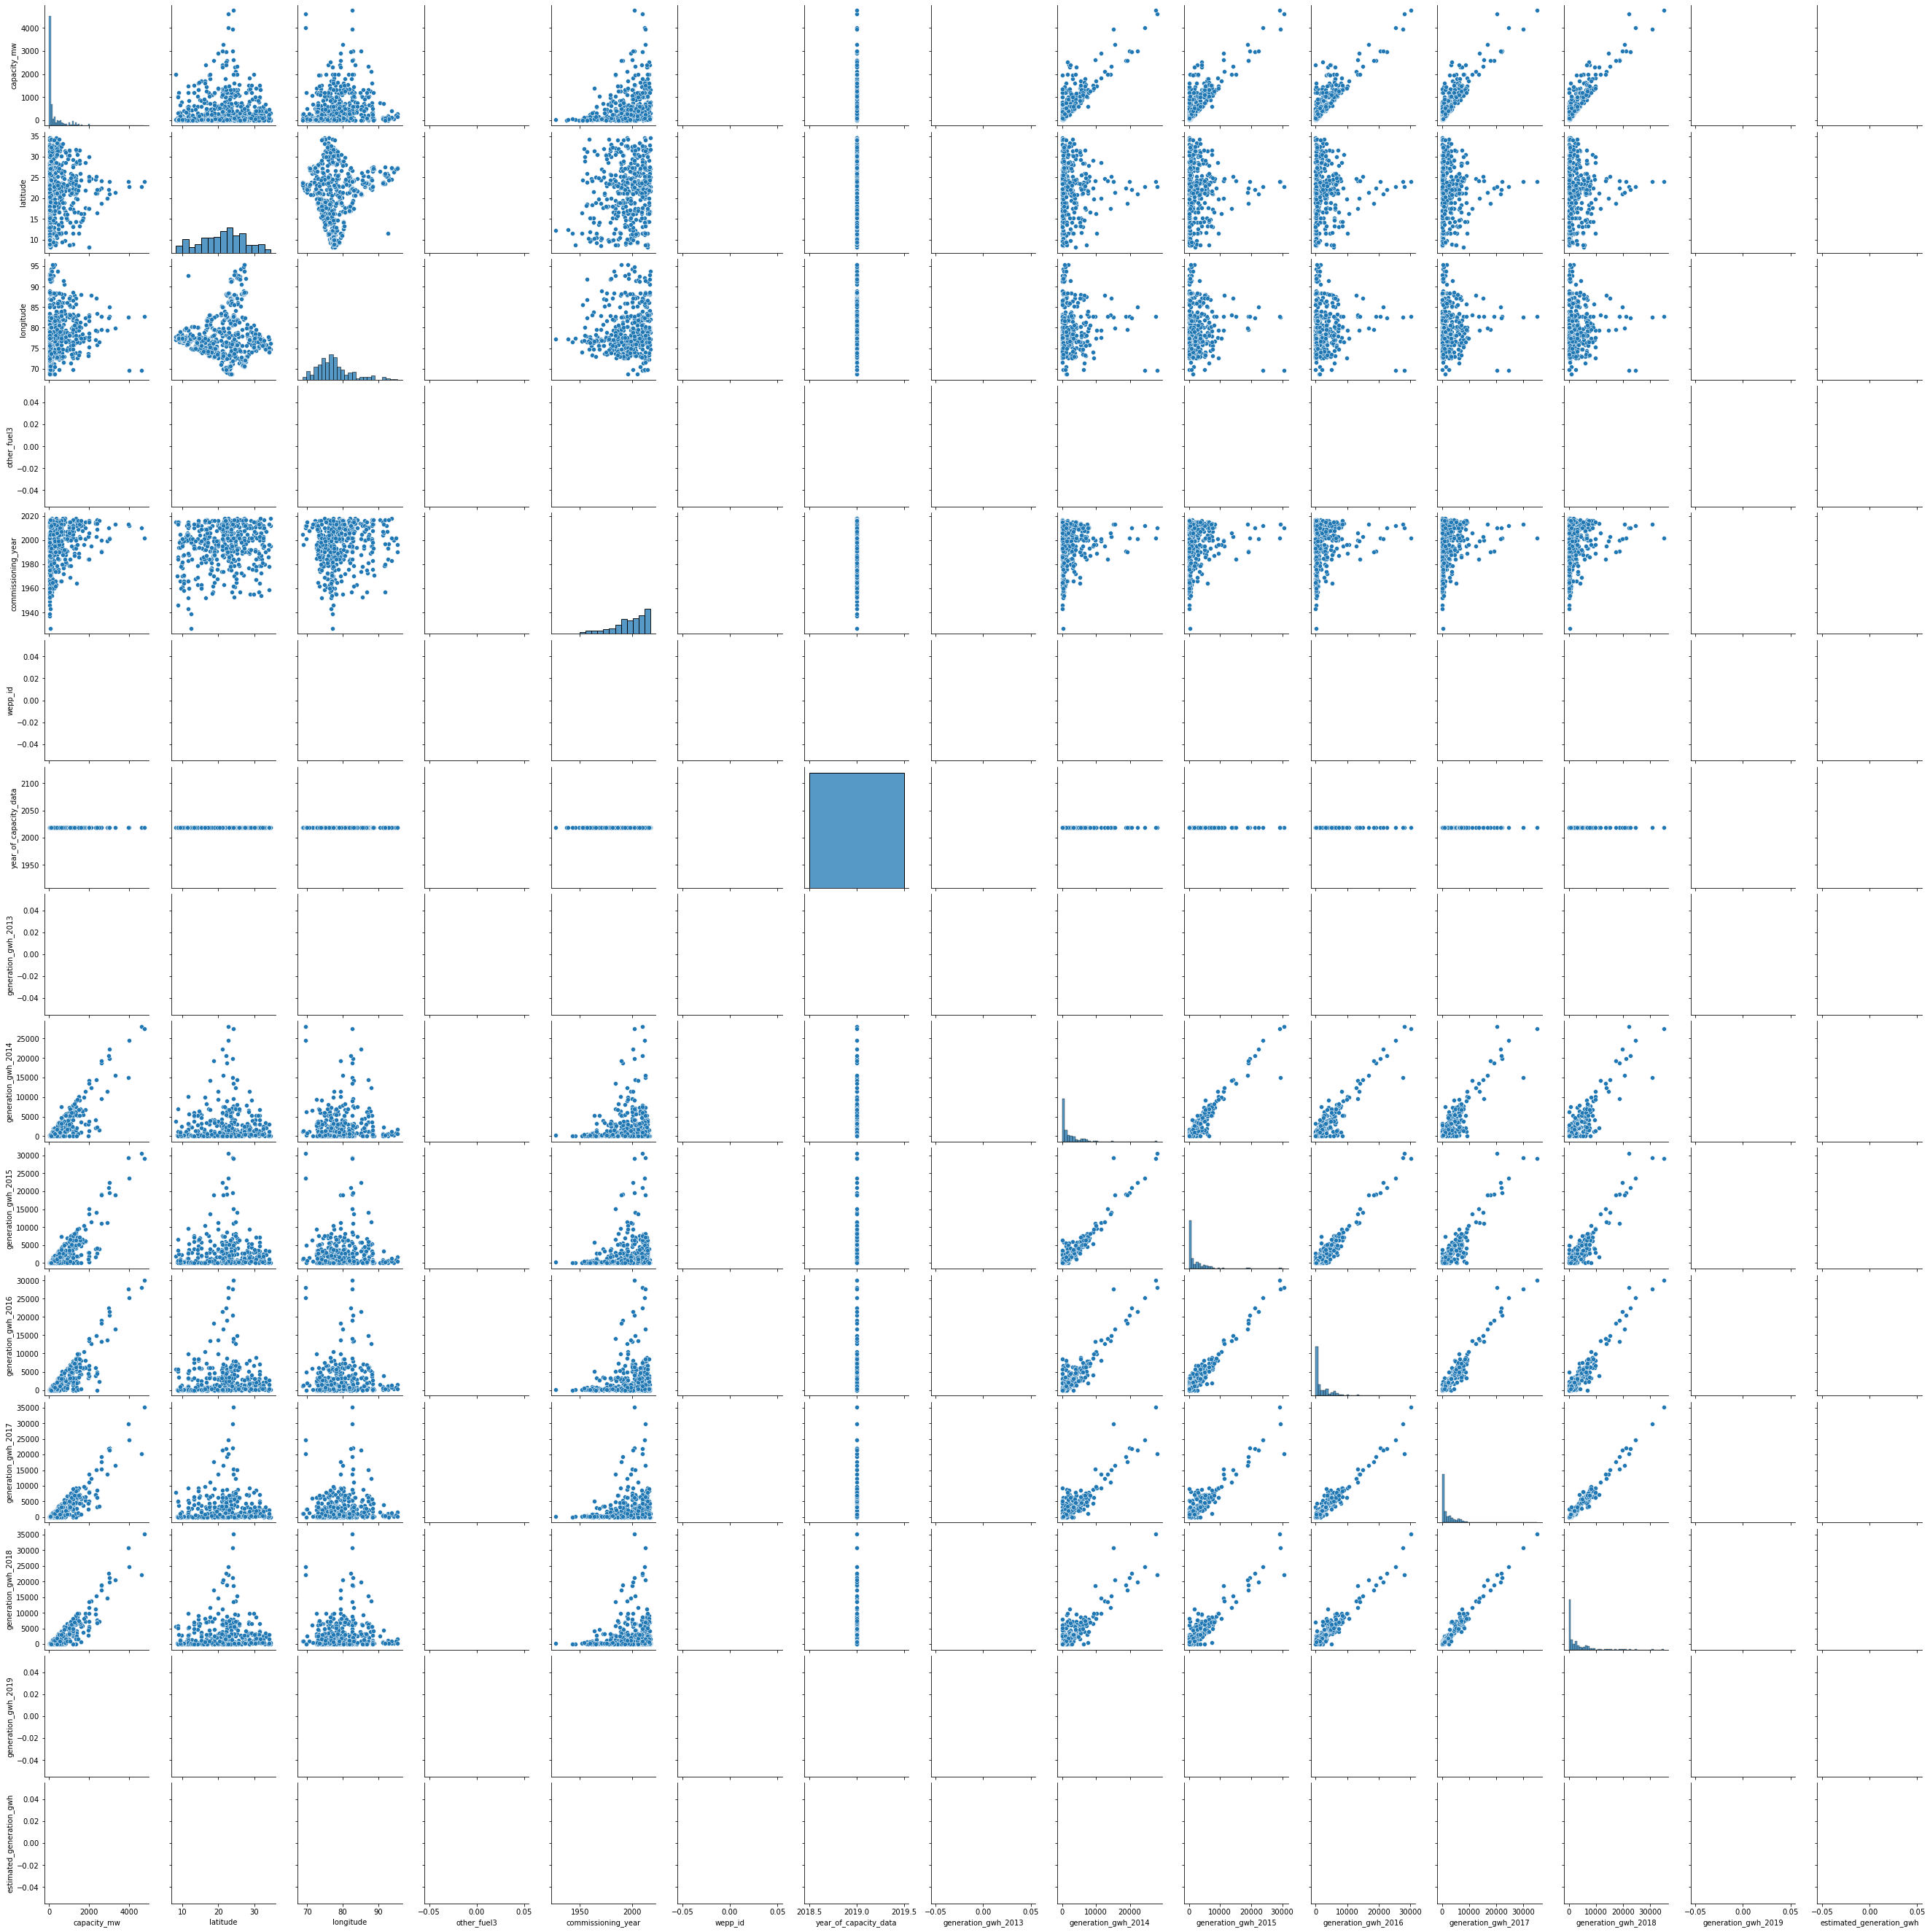

In [238]:
sns.pairplot(pow)

Updating Null values

In [239]:
pow.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We shall update:
- All continous data with the mean
- All Categorical data with the mode

Some columns which has no data or were majority of teh data is unavailable we will proceed with deletion of those columns.
Other_fuel1
other_fuel2
other_fuel3
wepp_id
generation_gwh_2013
generation_gwh_2019
estimated_generation_gwh

In [240]:
pow.drop('other_fuel1', axis=1, inplace=True)
pow.drop('other_fuel2', axis=1, inplace=True)
pow.drop('other_fuel3', axis=1, inplace=True)
pow.drop('wepp_id', axis=1, inplace=True)
pow.drop('generation_gwh_2013', axis=1, inplace=True)
pow.drop('generation_gwh_2019', axis=1, inplace=True)
pow.drop('estimated_generation_gwh', axis=1, inplace=True)

pow

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


country & country_long have the same data and since all the data in the column are the same we we will drop country column too.

In [241]:

pow.drop('country',axis=1,inplace=True)
pow.drop('country_long',axis=1,inplace=True)
pow

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
pow.shape

(907, 18)

we will proceed with filling the null values.

In [243]:
pow.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [244]:
pow.dtypes

name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

updating the null values of the columns with mode/mean

In [245]:
pow.latitude.nunique()

836

In [246]:
pow.latitude.median()

21.78

In [247]:
pow.latitude.mean()

21.19791811846691

In [248]:
pow.longitude.mean()

77.46490720092922

In [249]:
pow.longitude.median()

76.7195

In [250]:
#Since both mean & median of latitudes & longitudes are close by we will go by median as that is more realistic.
pow['latitude']=pow['latitude'].fillna(pow['latitude'].median())
pow['longitude']=pow['longitude'].fillna(pow['longitude'].median())


In [251]:
pow.sample(2)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
520,NARASINGPUR,WRI1020007,10.0,22.9649,78.8132,Biomass,NaN,Orient Power ltd,Orient Power ltd,http://www.orientgreenpower.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,LEIMAKHONG DG,IND0000231,36.0,21.7800,76.7195,Oil,1999.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,0.0,0.0,0.0,0.0,0.0,Central Electricity Authority


In [252]:
pow.commissioning_year.nunique()

73

In [253]:
pow.commissioning_year.mean()

1997.0910815939278

In [254]:
pow.commissioning_year.median()

2001.0

In [255]:
#we can choose mean or median for this as after 1980 there has been a high increase in power plants.
pow['commissioning_year']=pow['commissioning_year'].fillna(pow['commissioning_year'].median())



In [256]:
#As the column is string we have to use mode to fill the data

pow['owner']=pow['owner'].fillna(pow['owner'].mode()[0])
pow['geolocation_source']=pow['geolocation_source'].fillna(pow['geolocation_source'].mode()[0])

In [257]:
pow.year_of_capacity_data.mean()

2019.0

In [258]:
#as there is only 1 kind of data we will fill all columns with the same. Futher we can see whther we need to keep this columnor not.
pow['year_of_capacity_data']=pow['year_of_capacity_data'].fillna(pow['year_of_capacity_data'].median())


In [259]:
pow.generation_gwh_2014.nunique()

371

In [260]:
pow.generation_gwh_2014.mean()


2431.823590196344

In [261]:
#there is only 1 data in this column.
pow.generation_data_source.mode()

0    Central Electricity Authority
dtype: object

In [262]:
pow['generation_gwh_2014']=pow['generation_gwh_2014'].fillna(pow['generation_gwh_2014'].mean())
pow['generation_gwh_2015']=pow['generation_gwh_2015'].fillna(pow['generation_gwh_2015'].mean())
pow['generation_gwh_2016']=pow['generation_gwh_2016'].fillna(pow['generation_gwh_2016'].mean())
pow['generation_gwh_2017']=pow['generation_gwh_2017'].fillna(pow['generation_gwh_2017'].mean())
pow['generation_gwh_2018']=pow['generation_gwh_2018'].fillna(pow['generation_gwh_2018'].mean())
pow['generation_data_source']=pow['generation_data_source'].fillna(pow['generation_data_source'].mode()[0])

In [263]:
pow.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2001.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2001.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [264]:
pow.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

<AxesSubplot:>

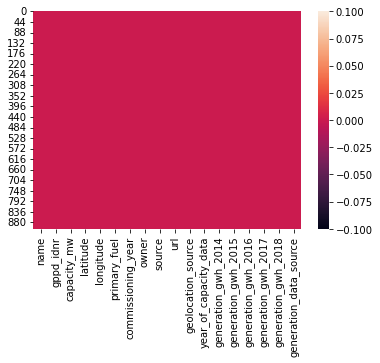

In [265]:
sns.heatmap(pow.isnull())

 Encoding

For further analysis we have to first convert all non numeric data to numerical data Here we shall adopt Ordinal Encoder to transform the all Non-numerical column into Numerical Data

In [266]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder

In [267]:
oe=OrdinalEncoder()

In [268]:
pow['name']=oe.fit_transform(pow['name'].values.reshape(-1,1))
pow['gppd_idnr']=oe.fit_transform(pow['gppd_idnr'].values.reshape(-1,1))
pow['primary_fuel']=oe.fit_transform(pow['primary_fuel'].values.reshape(-1,1))
pow['owner']=oe.fit_transform(pow['owner'].values.reshape(-1,1))
pow['source']=oe.fit_transform(pow['source'].values.reshape(-1,1))
pow['url']=oe.fit_transform(pow['url'].values.reshape(-1,1))
pow['geolocation_source']=oe.fit_transform(pow['geolocation_source'].values.reshape(-1,1))
pow['generation_data_source']=oe.fit_transform(pow['generation_data_source'].values.reshape(-1,1))



In [269]:
pow.dtypes

name                      float64
gppd_idnr                 float64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel              float64
commissioning_year        float64
owner                     float64
source                    float64
url                       float64
geolocation_source        float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source    float64
dtype: object

In [270]:
pow.sample(3)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
358,358.0,193.0,445.00,16.7346,81.8622,2.0,2009.0,5.0,22.0,58.0,2.0,2019.0,0.00000,0.000000,0.000000,2547.759305,0.000000,0.0
860,860.0,468.0,3.75,11.3727,76.0584,3.0,2004.0,5.0,22.0,58.0,2.0,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,0.0
659,659.0,789.0,16.50,23.9796,76.7329,6.0,2001.0,257.0,173.0,38.0,0.0,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,0.0


In [271]:
pow.describe().T

,count,mean,std,min,25%,50%,75%,max
name,907.0,453.000000,261.972645,0.0000,226.500000,453.000000,679.500000,906.000
gppd_idnr,907.0,453.000000,261.972645,0.0000,226.500000,453.000000,679.500000,906.000
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.227439,6.080491,8.1689,17.072000,21.780000,25.176450,34.649
longitude,907.0,77.427103,4.815073,68.6447,74.388900,76.719500,79.206100,95.408
primary_fuel,907.0,3.206174,2.280652,0.0000,1.000000,3.000000,6.000000,7.000
commissioning_year,907.0,1998.728776,13.158621,1927.0000,1998.000000,2001.000000,2003.000000,2018.000
owner,907.0,56.169791,82.529116,0.0000,5.000000,5.000000,95.500000,279.000
source,907.0,43.847850,44.642818,0.0000,22.000000,22.000000,29.500000,190.000
url,907.0,94.469680,70.381222,0.0000,58.000000,58.000000,115.500000,303.000


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

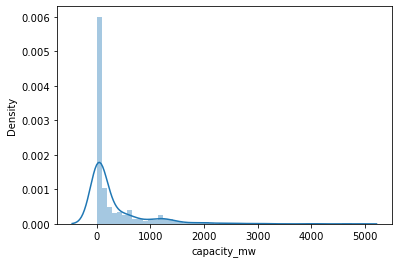

In [272]:
#Checking Normal distribution

sns.distplot(pow['capacity_mw'],kde=True)

<AxesSubplot:xlabel='latitude', ylabel='Density'>

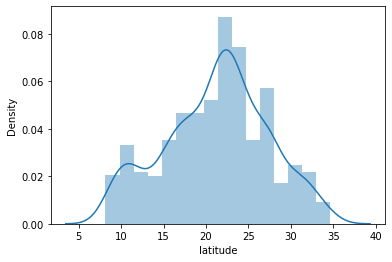

In [273]:
sns.distplot(pow['latitude'],kde=True)

<AxesSubplot:xlabel='longitude', ylabel='Density'>

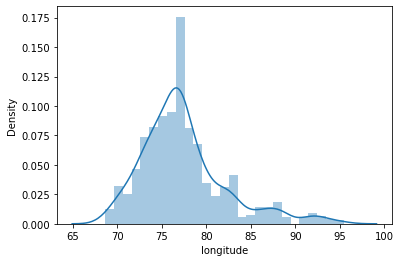

In [274]:
sns.distplot(pow['longitude'],kde=True)

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

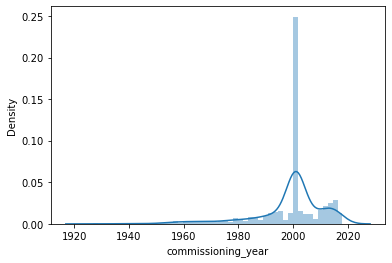

In [275]:
sns.distplot(pow['commissioning_year'],kde=True)

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

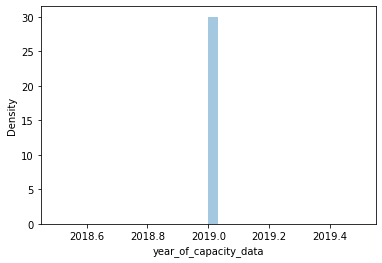

In [276]:
sns.distplot(pow['year_of_capacity_data'],kde=True)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

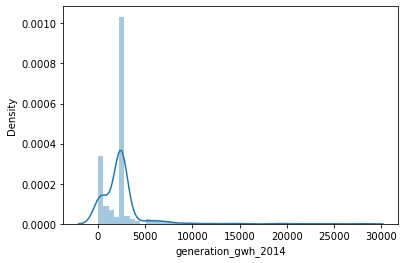

In [277]:
sns.distplot(pow['generation_gwh_2014'],kde=True)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

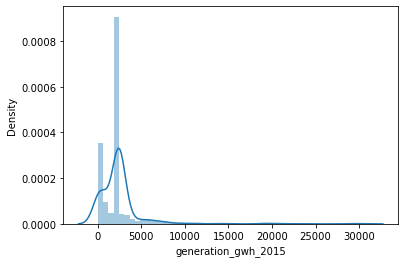

In [278]:
sns.distplot(pow['generation_gwh_2015'],kde=True)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

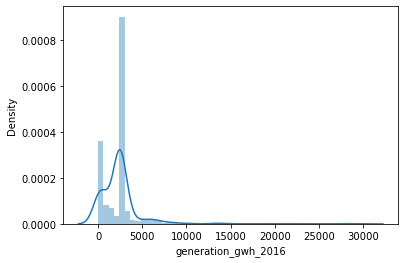

In [279]:
sns.distplot(pow['generation_gwh_2016'],kde=True)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

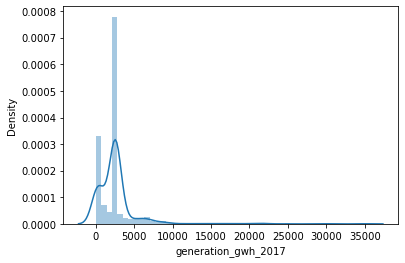

In [280]:
sns.distplot(pow['generation_gwh_2017'],kde=True)

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

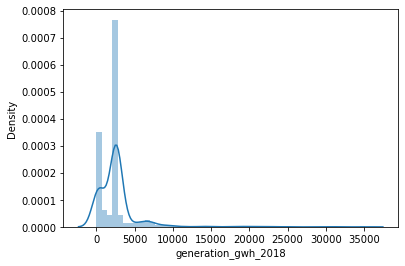

In [281]:
sns.distplot(pow['generation_gwh_2018'],kde=True)

Observations on Normal Distribution Check
From the above density plot:

- We can see that All the features does not obey a normal distribution.

- The normal distribution of non numerrical data has not been taken as they have no contribution to our Model Building.

- The normal distribution of 1) Primary Fuel 2) capacity_mw also is taken as though they are the target theya re also to be considered as independent features.

Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis;
    

    Collinearity Between Feature and Label
    Multicolinearity between features
    Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [282]:
#checking for general correlation
pow.corr()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
name,1.000000,0.332205,0.060240,-0.134571,0.019222,0.040753,-0.044514,9.807492e-02,-1.463951e-02,4.191727e-02,3.622452e-02,NaN,8.375890e-02,7.366460e-02,6.617668e-02,7.363387e-02,6.663814e-02,NaN
gppd_idnr,0.332205,1.000000,-0.335742,-0.105090,-0.378588,0.609180,0.167532,6.305894e-01,4.163838e-01,5.970803e-01,-4.641741e-01,NaN,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02,NaN
capacity_mw,0.060240,-0.335742,1.000000,0.048790,0.199299,-0.380395,0.211042,-3.110481e-01,-2.421218e-01,-2.438304e-01,2.048653e-01,NaN,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,NaN
latitude,-0.134571,-0.105090,0.048790,1.000000,0.035619,-0.007538,0.088098,-7.151589e-02,5.432370e-02,-1.291795e-01,-1.823192e-01,NaN,4.376364e-02,3.574228e-02,3.055074e-02,3.030986e-02,3.043825e-02,NaN
longitude,0.019222,-0.378588,0.199299,0.035619,1.000000,-0.352056,0.029583,-3.005465e-01,-2.366230e-01,-3.057676e-01,2.490998e-01,NaN,1.235147e-02,1.985463e-02,4.031576e-02,4.110091e-02,3.918265e-02,NaN
primary_fuel,0.040753,0.609180,-0.380395,-0.007538,-0.352056,1.000000,-0.054885,2.842958e-01,5.361263e-02,5.898861e-01,-4.832168e-01,NaN,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01,NaN
commissioning_year,-0.044514,0.167532,0.211042,0.088098,0.029583,-0.054885,1.000000,1.183841e-01,1.007472e-01,9.773925e-02,-7.390700e-02,NaN,1.316121e-01,1.457447e-01,1.687991e-01,1.690159e-01,1.724914e-01,NaN
owner,0.098075,0.630589,-0.311048,-0.071516,-0.300546,0.284296,0.118384,1.000000e+00,7.695825e-01,4.197726e-01,-3.848377e-01,NaN,1.211927e-18,-4.253175e-17,-8.115062e-18,-7.069909e-17,4.713271e-17,NaN
source,-0.014640,0.416384,-0.242122,0.054324,-0.236623,0.053613,0.100747,7.695825e-01,1.000000e+00,1.601444e-01,-5.057202e-01,NaN,1.917854e-18,-2.160931e-17,-4.925637e-17,-1.284552e-16,1.092118e-17,NaN
url,0.041917,0.597080,-0.243830,-0.129180,-0.305768,0.589886,0.097739,4.197726e-01,1.601444e-01,1.000000e+00,-1.892914e-02,NaN,3.902318e-17,-9.717344e-18,-5.344670e-17,-9.633418e-17,8.734433e-18,NaN


In [283]:
#checking for correlation between each feature and label-primary_fuel
pow.corr()['primary_fuel'].sort_values()

geolocation_source       -0.483217
capacity_mw              -0.380395
longitude                -0.352056
generation_gwh_2018      -0.136983
generation_gwh_2017      -0.132003
generation_gwh_2016      -0.131051
generation_gwh_2015      -0.124828
generation_gwh_2014      -0.124769
commissioning_year       -0.054885
latitude                 -0.007538
name                      0.040753
source                    0.053613
owner                     0.284296
url                       0.589886
gppd_idnr                 0.609180
primary_fuel              1.000000
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

In [284]:
pow.generation_data_source.unique()

array([0.])

In [285]:
pow.year_of_capacity_data.unique()

array([2019.])

#Since year_of_capacity_data is only 1 year 2019 we will remove this column
#And generation_data_source is same for all columns (Central Electricity Authority) we will be dropping both these columns.

In [286]:
pow.drop('generation_data_source',axis=1,inplace=True)
pow.drop('year_of_capacity_data',axis=1,inplace=True)

In [287]:
pow.sample()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
465,465.0,245.0,12.0,9.3294,76.8798,3.0,1994.0,5.0,22.0,58.0,2.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099


In [288]:
pow.shape

(907, 16)

In [289]:
#checking for correlation between each feature and label-primary_fuel
pow.corr()['primary_fuel'].sort_values()

geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.352056
generation_gwh_2018   -0.136983
generation_gwh_2017   -0.132003
generation_gwh_2016   -0.131051
generation_gwh_2015   -0.124828
generation_gwh_2014   -0.124769
commissioning_year    -0.054885
latitude              -0.007538
name                   0.040753
source                 0.053613
owner                  0.284296
url                    0.589886
gppd_idnr              0.609180
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

In [290]:
#checking for correlation between each feature and label-capacity_mw
pow.corr()['capacity_mw'].sort_values()

primary_fuel          -0.380395
gppd_idnr             -0.335742
owner                 -0.311048
url                   -0.243830
source                -0.242122
latitude               0.048790
name                   0.060240
longitude              0.199299
geolocation_source     0.204865
commissioning_year     0.211042
generation_gwh_2014    0.694350
generation_gwh_2015    0.711190
generation_gwh_2016    0.742221
generation_gwh_2017    0.757585
generation_gwh_2018    0.773456
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

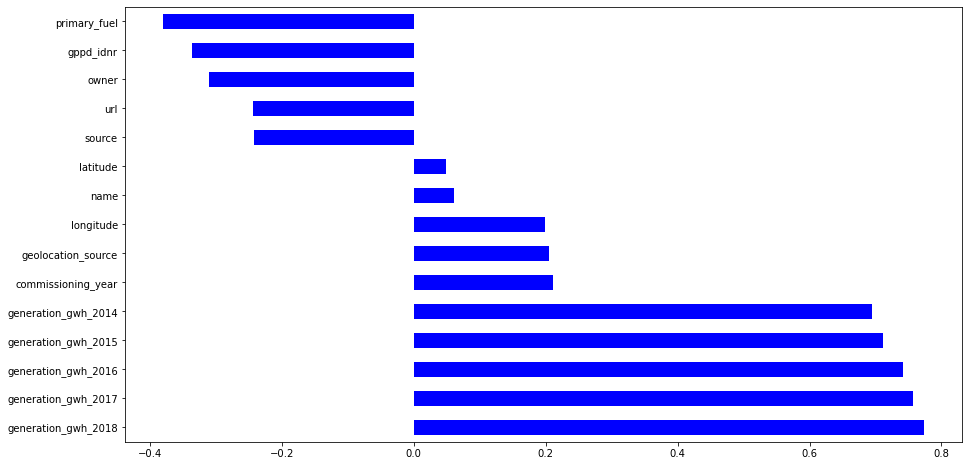

In [291]:
#capacity_mw

#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
pow.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='barh', color='b')
plt.show()

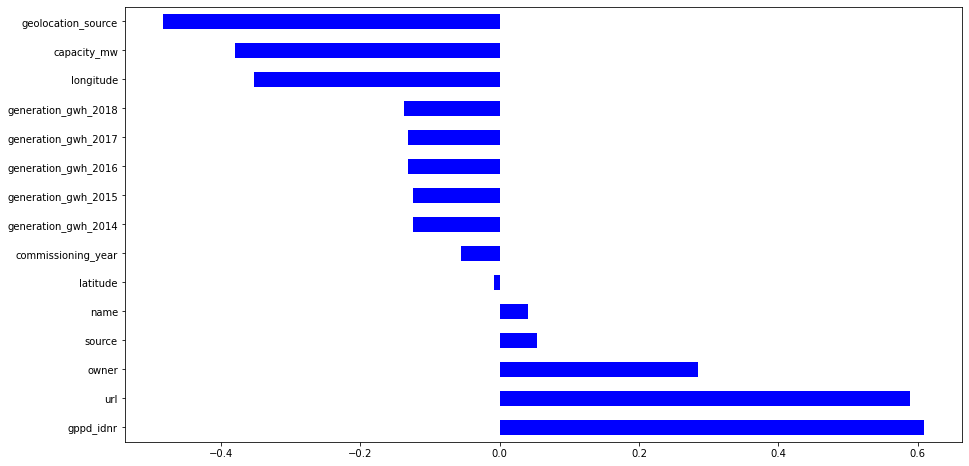

In [292]:
#primary_fuel

#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
pow.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='barh', color='b')
plt.show()

Multicollinearity Check

<AxesSubplot:>

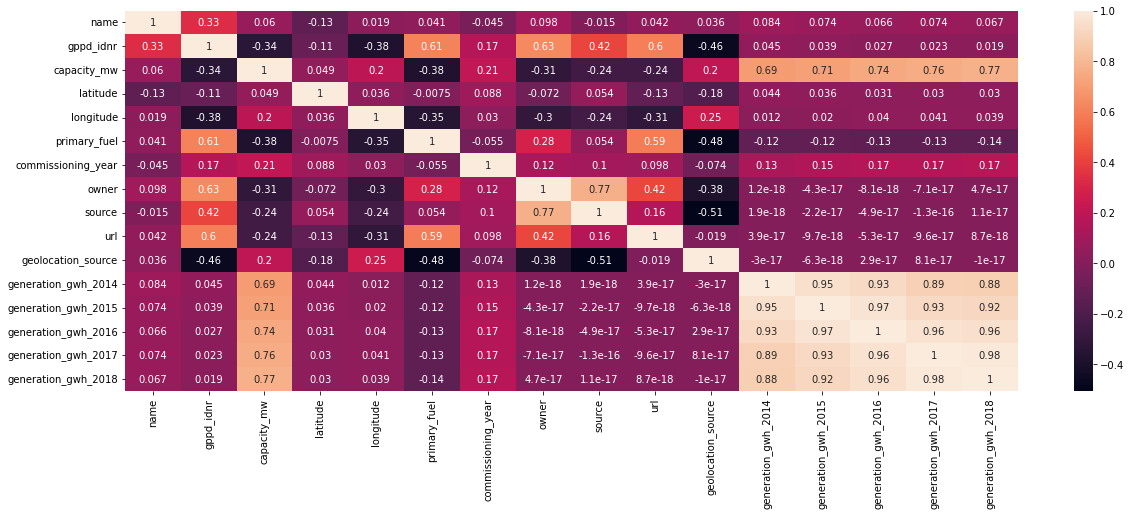

In [293]:
plt.figure(figsize=(20,7))
sns.heatmap(pow.corr(), annot=True)

Observations:
    generation_gwh_2014 is 69% correlated with capacity_mw.
    Owner & source are 77% correlated.
    We will cehck further on multicollinearity with VIF.
    
    

Checking for Outliers

name                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
gppd_idnr               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
capacity_mw             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
latitude                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
longitude                 AxesSubplot(0.125,0.518913;0.168478x0.16413)
primary_fuel           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
commissioning_year     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
owner                  AxesSubplot(0.731522,0.518913;0.168478x0.16413)
source                    AxesSubplot(0.125,0.321957;0.168478x0.16413)
url                    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
geolocation_source     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
generation_gwh_2014    AxesSubplot(0.731522,0.321957;0.168478x0.16413)
generation_gwh_2015          AxesSubplot(0.125,0.125;0.168478x0.16413)
generation_gwh_2016       AxesSubplot(0.327174,0.125;0.168478x0.16413)
genera

<Figure size 1080x648 with 0 Axes>

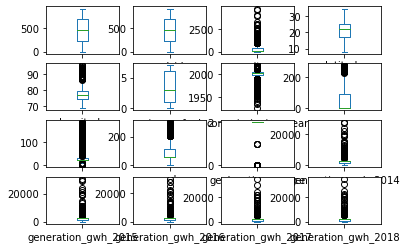

In [294]:
plt.figure(figsize=(15,9))

pow.plot(kind='box',subplots= True, layout=(4,4))

Observation:
     -  The outlier of the categorical data does not impact our model
 
     - The outlier of the Target data does not impact our model
    - We will cehck zscore & remove the outliers in the the otehr columns

<AxesSubplot:xlabel='geolocation_source'>

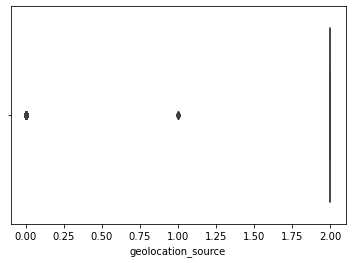

In [295]:
sns.boxplot(pow['geolocation_source'])

<AxesSubplot:xlabel='capacity_mw'>

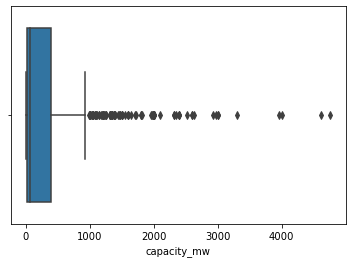

In [296]:
sns.boxplot(pow['capacity_mw'])

<AxesSubplot:xlabel='commissioning_year'>

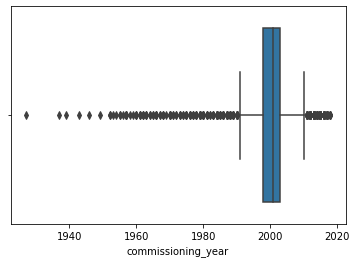

In [297]:
sns.boxplot(pow['commissioning_year'])

<AxesSubplot:xlabel='generation_gwh_2015'>

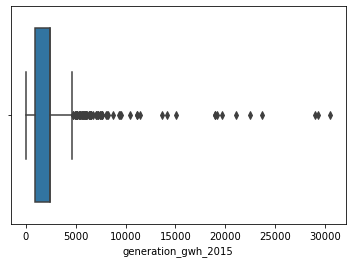

In [298]:
sns.boxplot(pow['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016'>

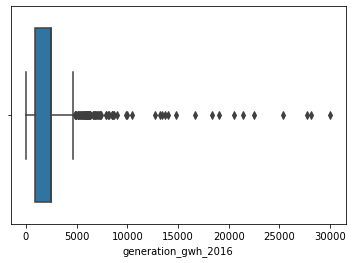

In [299]:
sns.boxplot(pow['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017'>

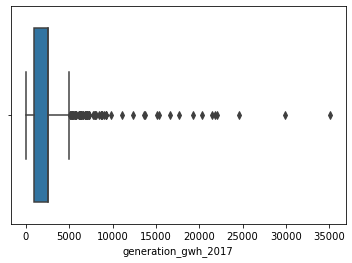

In [300]:
sns.boxplot(pow['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2018'>

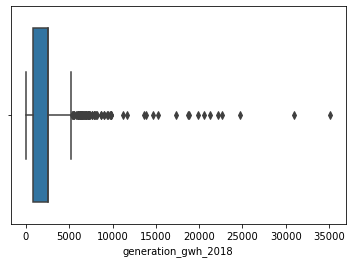

In [301]:
sns.boxplot(pow['generation_gwh_2018'])

In [302]:
#Checking for skewness in each independent variable
pow.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            3.123576
latitude              -0.164152
longitude              1.163320
primary_fuel           0.472251
commissioning_year    -1.719575
owner                  1.364406
source                 1.827373
url                    1.510537
geolocation_source    -2.159841
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.80.Meaning any value outside +/-0.80 contains skewness. 
    

DATA PREPROCESSING

 Removal of Duplicates and Unwanted Column

In [303]:
pow.drop_duplicates(inplace =True)
pow.shape

(907, 16)

It appears there are no duplicates as there is no change in the number of rows.

Dropping of Features that strongly promotes multicollinearity(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

We will be using primary fuel as out target variable. So we need to move it the last column.
We are renamoing it as new_primary_fuel.

In [304]:
pow['new_primary_fuel']= pow['primary_fuel']
pow

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel
0,0.0,657.0,2.5,28.1839,73.2407,6.0,2011.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0
1,1.0,519.0,98.0,24.7663,74.6090,1.0,2001.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0
2,2.0,853.0,39.2,21.9038,69.3732,7.0,2001.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0
3,3.0,0.0,135.0,23.8712,91.3602,2.0,2004.0,5.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,2.0
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2015.0,5.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,1600.0,16.2949,77.3568,1.0,2016.0,5.0,22.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1.0
903,903.0,822.0,3.0,12.8932,78.1654,6.0,2001.0,114.0,77.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0
904,904.0,891.0,25.5,15.2758,75.5811,7.0,2001.0,5.0,21.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0
905,905.0,539.0,80.0,24.3500,73.7477,1.0,2001.0,91.0,59.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0


In [305]:
pow.drop('primary_fuel', axis=1, inplace=True)
pow

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel
0,0.0,657.0,2.5,28.1839,73.2407,2011.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0
1,1.0,519.0,98.0,24.7663,74.6090,2001.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0
2,2.0,853.0,39.2,21.9038,69.3732,2001.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0
3,3.0,0.0,135.0,23.8712,91.3602,2004.0,5.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,2.0
4,4.0,1.0,1800.0,21.9603,82.4091,2015.0,5.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,1600.0,16.2949,77.3568,2016.0,5.0,22.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1.0
903,903.0,822.0,3.0,12.8932,78.1654,2001.0,114.0,77.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0
904,904.0,891.0,25.5,15.2758,75.5811,2001.0,5.0,21.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0
905,905.0,539.0,80.0,24.3500,73.7477,2001.0,91.0,59.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0


In [306]:
pow.sample()

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel
33,33.0,707.0,5.0,27.36,71.6918,2001.0,52.0,84.0,100.0,0.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,6.0


In [307]:
x=pow.drop(columns=['new_primary_fuel'])
y=pow['new_primary_fuel']

In [308]:
y

0      6.0
1      1.0
2      7.0
3      2.0
4      1.0
      ... 
902    1.0
903    6.0
904    7.0
905    1.0
906    7.0
Name: new_primary_fuel, Length: 907, dtype: float64

In [309]:
print(x.shape)
print(y.shape)

(907, 15)
(907,)


In [310]:
from sklearn.preprocessing import StandardScaler

In [311]:
scalar=StandardScaler()
x_Scaled = scalar.fit_transform(x)
x_Scaled

array([[-1.73014221e+00,  7.79136890e-01, -5.48907549e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       [-1.72632291e+00,  2.52073700e-01, -3.86977292e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       [-1.72250361e+00,  1.52771939e+00, -4.86678853e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       ...,
       [ 1.72250361e+00,  1.67285273e+00, -5.09908639e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       [ 1.72632291e+00,  3.28459669e-01, -4.17498178e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       [ 1.73014221e+00,  1.61556326e+00, -5.25169082e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16]])

In [312]:
#checking the shape
x_Scaled.shape

(907, 15)

In [313]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [314]:
#creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [315]:
vif['vif']=[variance_inflation_factor(x_Scaled, i) for i in range(x_Scaled.shape[1])]

In [316]:
vif['Features'] = x.columns
vif

,vif,Features
0,1.473340,name
1,4.377678,gppd_idnr
2,4.482238,capacity_mw
3,1.114439,latitude
4,1.247324,longitude
5,1.237737,commissioning_year
6,3.781536,owner
7,3.112490,source
8,2.072833,url
9,2.006621,geolocation_source


Checking out for Outliers using Zscore

In [317]:
import scipy.stats
from scipy.stats import zscore

In [318]:
z=np.abs(zscore(pow))
z

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel
0,1.730142,0.779137,0.548908,1.144693,0.869917,0.933076,2.095328,1.460215,0.476673,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.225688
1,1.726323,0.252074,0.386977,0.582324,0.585590,0.172699,2.446913,2.917019,1.116401,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.967877
2,1.722504,1.527719,0.486679,0.111296,1.673567,0.172699,0.656734,0.512075,1.571318,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.664401
3,1.718684,1.730142,0.324240,0.435034,2.895239,0.400812,0.620363,0.489662,0.518459,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01,0.529164
4,1.714865,1.726323,2.498942,0.120593,1.035238,1.237227,0.620363,0.489662,0.518459,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00,0.967877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.714865,0.145133,2.159821,0.811655,0.014609,1.313265,0.620363,0.489662,0.518459,0.394241,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01,0.967877
903,1.718684,1.409321,0.548060,1.371409,0.153415,0.172699,0.701112,0.743019,1.030242,2.560940,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.225688
904,1.722504,1.672853,0.509909,0.979349,0.383592,0.172699,0.620363,0.512075,2.353208,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.664401
905,1.726323,0.328460,0.417498,0.513821,0.764564,0.172699,0.422268,0.339596,0.177271,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.967877


In [319]:
#checking datashape of z
z.shape

(907, 16)

In [320]:
threshold =3
np.where(z>3)
len(np.where(z>3)[0])

150

In [321]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
pow_fuel_new=pow[(z<3).all(axis=1)]

#old Dataset
print("Old DataFrame",pow.shape)
#Dataset after removal of outliers
print("New DataFrame",pow_fuel_new.shape)
# total rows deleted
print("total_dropped_rows",pow.shape[0]-pow_fuel_new.shape[0])

Old DataFrame (907, 16)
New DataFrame (833, 16)
total_dropped_rows 74


In [322]:
#dataset after removignoutliers
pow_fuel_new

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel
0,0.0,657.0,2.5,28.1839,73.2407,2011.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0
1,1.0,519.0,98.0,24.7663,74.6090,2001.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0
2,2.0,853.0,39.2,21.9038,69.3732,2001.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0
3,3.0,0.0,135.0,23.8712,91.3602,2004.0,5.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,2.0
4,4.0,1.0,1800.0,21.9603,82.4091,2015.0,5.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,1600.0,16.2949,77.3568,2016.0,5.0,22.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1.0
903,903.0,822.0,3.0,12.8932,78.1654,2001.0,114.0,77.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0
904,904.0,891.0,25.5,15.2758,75.5811,2001.0,5.0,21.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0
905,905.0,539.0,80.0,24.3500,73.7477,2001.0,91.0,59.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0


In [323]:
#Lets reset our data having removed outliers
pow_fuel_new.reset_index(inplace=True)
pow_fuel_new

,index,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel
0,0,0.0,657.0,2.5,28.1839,73.2407,2011.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0
1,1,1.0,519.0,98.0,24.7663,74.6090,2001.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0
2,2,2.0,853.0,39.2,21.9038,69.3732,2001.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0
3,3,3.0,0.0,135.0,23.8712,91.3602,2004.0,5.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,2.0
4,4,4.0,1.0,1800.0,21.9603,82.4091,2015.0,5.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,902,902.0,491.0,1600.0,16.2949,77.3568,2016.0,5.0,22.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1.0
829,903,903.0,822.0,3.0,12.8932,78.1654,2001.0,114.0,77.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0
830,904,904.0,891.0,25.5,15.2758,75.5811,2001.0,5.0,21.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0
831,905,905.0,539.0,80.0,24.3500,73.7477,2001.0,91.0,59.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0


In [324]:
#dropping the index columns which is not needed
pow_fuel_new.drop('index', axis=1,inplace=True)
pow_fuel_new

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel
0,0.0,657.0,2.5,28.1839,73.2407,2011.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0
1,1.0,519.0,98.0,24.7663,74.6090,2001.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0
2,2.0,853.0,39.2,21.9038,69.3732,2001.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0
3,3.0,0.0,135.0,23.8712,91.3602,2004.0,5.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,2.0
4,4.0,1.0,1800.0,21.9603,82.4091,2015.0,5.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,902.0,491.0,1600.0,16.2949,77.3568,2016.0,5.0,22.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1.0
829,903.0,822.0,3.0,12.8932,78.1654,2001.0,114.0,77.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0
830,904.0,891.0,25.5,15.2758,75.5811,2001.0,5.0,21.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0
831,905.0,539.0,80.0,24.3500,73.7477,2001.0,91.0,59.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0


Transforming Data to Remove Skewness using Power transformation

In [325]:
from sklearn.preprocessing import power_transform

In [326]:
pow_fuel_new.skew()

name                   0.021476
gppd_idnr             -0.054302
capacity_mw            1.950900
latitude              -0.131075
longitude              0.936933
commissioning_year    -1.266675
owner                  1.320280
source                 1.782665
url                    1.430461
geolocation_source    -2.102192
generation_gwh_2014    1.523020
generation_gwh_2015    1.388494
generation_gwh_2016    1.411175
generation_gwh_2017    1.278034
generation_gwh_2018    1.315084
new_primary_fuel       0.411447
dtype: float64

From the above the some features are skewed based on a threshold of +/-0.8

In [327]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method ='yeo-johnson')

In [328]:
#extracting the columns that are skewed
data=['capacity_mw','commissioning_year','owner','source','url','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [329]:
#Now removing skewness by Power Transformation a nd updating dataset(bdmtrain_new) with result
pow_fuel_new[data] = scaler.fit_transform(pow_fuel_new[data].values)
pow_fuel_new

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel
0,0.0,657.0,-1.670853,28.1839,73.2407,1.148978,1.476573,1.613712,0.721270,-2.279786,0.332872,0.362399,0.365805,0.366529,0.381706,6.0
1,1.0,519.0,0.208135,24.7663,74.6090,0.004001,1.500483,2.087889,1.195402,0.404200,0.332872,0.362399,0.365805,0.366529,0.381706,1.0
2,2.0,853.0,-0.287113,21.9038,69.3732,0.004001,-1.854805,-0.468791,1.472193,0.404200,0.332872,0.362399,0.365805,0.366529,0.381706,7.0
3,3.0,0.0,0.380661,23.8712,91.3602,0.320411,-0.738796,-0.400650,-0.424431,0.404200,-1.027947,-0.713853,-0.666527,-0.886415,-0.906368,2.0
4,4.0,1.0,1.747194,21.9603,82.4091,1.685448,-0.738796,-0.400650,-0.424431,0.404200,0.666898,1.877512,1.913910,1.550530,2.096576,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,902.0,491.0,1.686341,16.2949,77.3568,1.827386,-0.738796,-0.400650,-0.424431,0.404200,0.332872,-2.087281,-1.401279,-0.703339,-0.848318,1.0
829,903.0,822.0,-1.593530,12.8932,78.1654,0.004001,1.303905,1.229535,-1.640890,-2.480423,0.332872,0.362399,0.365805,0.366529,0.381706,6.0
830,904.0,891.0,-0.518920,15.2758,75.5811,0.004001,-0.738796,-0.468791,1.871875,0.404200,0.332872,0.362399,0.365805,0.366529,0.381706,7.0
831,905.0,539.0,0.098579,24.3500,73.7477,0.004001,1.233959,0.915820,0.059349,0.404200,0.332872,0.362399,0.365805,0.366529,0.381706,1.0


In [330]:
#rechecking for skewness
pow_fuel_new.skew()

name                   0.021476
gppd_idnr             -0.054302
capacity_mw            0.011203
latitude              -0.131075
longitude              0.936933
commissioning_year    -0.315826
owner                  0.437361
source                -0.178437
url                    0.064272
geolocation_source    -2.074065
generation_gwh_2014   -0.250359
generation_gwh_2015   -0.313329
generation_gwh_2016   -0.312876
generation_gwh_2017   -0.343626
generation_gwh_2018   -0.356983
new_primary_fuel       0.411447
dtype: float64

Now majority of the columns skewness is brought down.

In [331]:
x=pow_fuel_new.iloc[:,0:-1]
x.shape

(833, 15)

In [332]:
x.sample()

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
543,586.0,315.0,0.471935,21.4813,79.2086,-1.288457,-0.738796,-0.40065,-0.424431,0.4042,-1.300098,-1.211641,-1.218148,-1.536021,-1.572925


In [333]:
y=pow_fuel_new.iloc[:,-1]

In [334]:
y.shape

(833,)

MODEL BUILDING

Logistic Regression

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [336]:
lr=LogisticRegression()

In [337]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [338]:
lr.fit(x_train,y_train)

LogisticRegression()

In [339]:

pred=lr.predict(x_test)
pred

array([6., 1., 1., 7., 3., 1., 6., 3., 0., 3., 3., 6., 7., 1., 1., 3., 6.,
       3., 6., 7., 6., 3., 6., 3., 1., 6., 3., 1., 3., 1., 3., 1., 3., 3.,
       3., 1., 7., 3., 7., 3., 1., 1., 3., 7., 3., 1., 3., 1., 1., 3., 3.,
       1., 3., 6., 3., 7., 3., 6., 3., 6., 1., 3., 3., 1., 1., 1., 3., 3.,
       3., 3., 3., 3., 3., 6., 1., 1., 1., 1., 3., 1., 3., 6., 1., 3., 7.,
       3., 1., 7., 7., 1., 3., 3., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3.,
       6., 7., 1., 7., 1., 1., 7., 3., 3., 3., 1., 3., 1., 3., 3., 1., 3.,
       3., 1., 1., 1., 3., 6., 3., 3., 1., 6., 3., 3., 3., 1., 6., 7., 1.,
       3., 1., 1., 3., 3., 3., 3., 3., 6., 1., 3., 3., 3., 3., 3., 3., 1.,
       3., 3., 6., 7., 1., 7., 6., 3., 1., 3., 6., 6., 3., 3.])

In [340]:
acc_lr=(accuracy_score(y_test,pred))
acc_lr

0.5748502994011976

In [341]:
confusion_matrix(y_test,pred)

array([[ 1, 14,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0, 24,  0,  0,  0,  0],
       [ 0,  4,  0, 10,  0,  0,  0,  0],
       [ 0,  5,  0, 43,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 14,  3],
       [ 0,  0,  0,  0,  0,  0,  8, 13]], dtype=int64)

<AxesSubplot:>

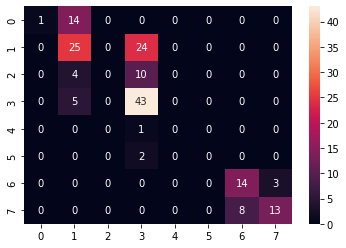

In [342]:
cf=confusion_matrix(y_test,pred)
sns.heatmap(cf,annot=True)

In [343]:
cl_report=classification_report(y_test,pred)
print(cl_report)

              precision    recall  f1-score   support

         0.0       1.00      0.07      0.12        15
         1.0       0.52      0.51      0.52        49
         2.0       0.00      0.00      0.00        14
         3.0       0.54      0.90      0.67        48
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.64      0.82      0.72        17
         7.0       0.81      0.62      0.70        21

    accuracy                           0.57       167
   macro avg       0.44      0.36      0.34       167
weighted avg       0.56      0.57      0.52       167



Checking for overfitting in Logistic Regression model.

Cross Validation of Logistic Regression

In [344]:
from sklearn.model_selection import cross_val_score

In [345]:
scr=cross_val_score(lr,x,y,cv=5)
print(scr)
lrcv_scr=round(scr.mean(),2)
print(round(scr.std()),2)
print("The cv score for Linear Regression:",lrcv_scr)

[0.62275449 0.62275449 0.62275449 0.69879518 0.5060241 ]
0 2
The cv score for Linear Regression: 0.61


Gaussian Naive Bayes

In [346]:
from sklearn.naive_bayes import GaussianNB

In [347]:
gb=GaussianNB()

In [348]:
gb.fit(x_train,y_train)

GaussianNB()

In [349]:
pred=gb.predict(x_test)
pred

array([7., 3., 3., 7., 3., 0., 6., 3., 0., 3., 3., 6., 7., 0., 0., 3., 6.,
       3., 6., 7., 7., 3., 7., 3., 4., 6., 3., 3., 3., 4., 3., 3., 3., 3.,
       3., 3., 7., 3., 6., 3., 3., 3., 3., 7., 3., 0., 3., 0., 0., 3., 3.,
       0., 3., 6., 3., 7., 3., 6., 3., 6., 6., 3., 3., 3., 0., 0., 3., 3.,
       3., 3., 3., 3., 3., 6., 0., 4., 3., 4., 3., 3., 3., 6., 3., 3., 6.,
       3., 0., 6., 7., 4., 3., 3., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       7., 7., 0., 7., 0., 3., 7., 3., 3., 3., 4., 3., 4., 3., 3., 3., 3.,
       3., 1., 0., 0., 3., 6., 3., 3., 0., 7., 3., 3., 3., 0., 7., 7., 0.,
       3., 0., 4., 3., 3., 3., 3., 3., 7., 0., 3., 3., 3., 3., 4., 3., 0.,
       3., 4., 6., 7., 0., 7., 6., 3., 3., 3., 7., 6., 3., 3.])

In [350]:
acc_gb=round(accuracy_score(y_test,pred),2)
acc_gb

0.61

In [351]:
confusion_matrix(y_test,pred)
cf=confusion_matrix(y_test,pred)
cf

array([[15,  0,  0,  0,  0,  0,  0,  0],
       [ 8,  1,  0, 29, 10,  0,  1,  0],
       [ 1,  0,  0, 13,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 21]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77        15
         1.0       1.00      0.02      0.04        49
         2.0       0.00      0.00      0.00        14
         3.0       0.52      1.00      0.68        48
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.94      1.00      0.97        17
         7.0       1.00      1.00      1.00        21

    accuracy                           0.61       167
   macro avg       0.51      0.50      0.43       167
weighted avg       0.72      0.61      0.50       167



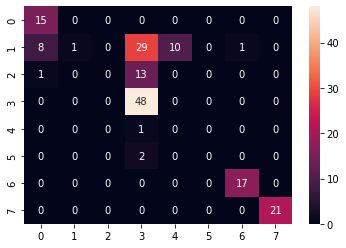

In [352]:
sns.heatmap(cf,annot=True)
print(classification_report(y_test,pred))

Cross validation of Gaussian Naive Bayes

In [353]:
gb_scr=cross_val_score(gb,x,y,cv=5)
print(gb_scr)
gb_cv_scr=round(gb_scr.mean(),2)
print(round(gb_scr.std()),2)
print("The cv score for Gaussian Naive Bayes:",gb_cv_scr)

[0.64071856 0.5988024  0.61676647 0.61445783 0.6686747 ]
0 2
The cv score for Gaussian Naive Bayes: 0.63


Decision Tree Classifier

In [354]:
from sklearn.tree import DecisionTreeClassifier

In [355]:
dtc=DecisionTreeClassifier()

In [356]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [357]:
pred=dtc.predict(x_test)
pred

array([7., 1., 5., 7., 2., 0., 6., 3., 0., 3., 2., 6., 7., 1., 1., 3., 6.,
       2., 6., 7., 7., 3., 7., 2., 1., 6., 3., 1., 1., 1., 1., 1., 1., 3.,
       1., 3., 7., 3., 6., 3., 5., 1., 3., 7., 2., 0., 3., 0., 1., 3., 3.,
       0., 3., 6., 3., 7., 3., 6., 1., 6., 2., 2., 1., 3., 1., 1., 1., 2.,
       2., 3., 3., 1., 3., 6., 1., 1., 1., 1., 3., 1., 3., 6., 3., 1., 6.,
       3., 1., 6., 7., 1., 1., 1., 1., 3., 5., 2., 3., 1., 3., 3., 1., 3.,
       7., 7., 0., 7., 0., 1., 7., 3., 3., 1., 1., 3., 1., 2., 3., 3., 1.,
       1., 3., 0., 1., 3., 6., 3., 3., 1., 7., 2., 3., 3., 1., 7., 7., 1.,
       5., 0., 1., 2., 3., 1., 1., 1., 7., 1., 1., 2., 3., 3., 1., 1., 0.,
       3., 1., 6., 7., 1., 7., 6., 3., 3., 3., 7., 6., 1., 1.])

In [358]:
acc_dtc=round(accuracy_score(y_test,pred),2)
acc_dtc

0.8

In [359]:
confusion_matrix(y_test,pred)

array([[ 8,  7,  0,  0,  0,  0,  0,  0],
       [ 1, 41,  4,  2,  0,  1,  0,  0],
       [ 1,  2,  5,  4,  0,  2,  0,  0],
       [ 0,  3,  4, 41,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 21]], dtype=int64)

<AxesSubplot:>

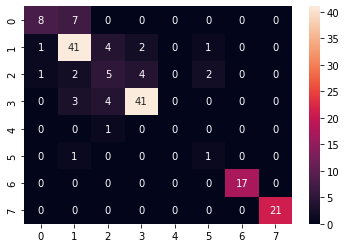

In [360]:
cf=confusion_matrix(y_test,pred)
sns.heatmap(cf,annot=True)

In [361]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.80      0.53      0.64        15
         1.0       0.76      0.84      0.80        49
         2.0       0.36      0.36      0.36        14
         3.0       0.87      0.85      0.86        48
         4.0       0.00      0.00      0.00         1
         5.0       0.25      0.50      0.33         2
         6.0       1.00      1.00      1.00        17
         7.0       1.00      1.00      1.00        21

    accuracy                           0.80       167
   macro avg       0.63      0.64      0.62       167
weighted avg       0.81      0.80      0.80       167



Cross Validation of Decision Tree Classifier

In [362]:
dtc_scr=cross_val_score(dtc,x,y,cv=5)
print(dtc_scr)
dtc_cv_scr=round(dtc_scr.mean(),2)
print(round(dtc_scr.std()),2)
print("The cv score for Decision Tree:",dtc_cv_scr)

[0.78443114 0.79640719 0.80239521 0.78915663 0.71686747]
0 2
The cv score for Decision Tree: 0.78


SVC 

In [363]:
from sklearn.svm import SVC

In [364]:
svc=SVC()

In [365]:
svc.fit(x_train,y_train)

SVC()

In [366]:
pred=svc.predict(x_test)
pred

array([6., 3., 3., 7., 3., 1., 6., 3., 1., 3., 3., 6., 7., 1., 1., 3., 6.,
       3., 1., 7., 1., 3., 6., 3., 3., 6., 3., 1., 3., 3., 3., 3., 3., 3.,
       3., 3., 7., 3., 7., 3., 3., 1., 3., 7., 3., 1., 3., 1., 1., 3., 3.,
       1., 3., 6., 3., 6., 3., 6., 3., 7., 1., 3., 3., 3., 1., 1., 3., 3.,
       3., 3., 3., 3., 3., 6., 1., 3., 1., 3., 3., 1., 3., 6., 3., 3., 6.,
       3., 1., 6., 7., 3., 3., 3., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3.,
       1., 7., 1., 7., 1., 1., 6., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3.,
       3., 1., 1., 1., 3., 7., 3., 3., 1., 6., 3., 3., 3., 1., 1., 7., 1.,
       3., 1., 3., 3., 3., 3., 3., 3., 1., 1., 3., 3., 3., 3., 3., 3., 1.,
       3., 3., 6., 7., 1., 7., 6., 3., 1., 3., 6., 6., 3., 3.])

In [367]:
acc_svc=round(accuracy_score(y_test,pred),2)
acc_svc

0.51

In [368]:
confusion_matrix(y_test,pred)
cf=confusion_matrix(y_test,pred)
cf

array([[ 0, 15,  0,  0,  0,  0,  0,  0],
       [ 0, 15,  0, 34,  0,  0,  0,  0],
       [ 0,  2,  0, 12,  0,  0,  0,  0],
       [ 0,  2,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 13,  3],
       [ 0,  4,  0,  0,  0,  0,  6, 11]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.38      0.31      0.34        49
         2.0       0.00      0.00      0.00        14
         3.0       0.48      0.96      0.64        48
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.68      0.76      0.72        17
         7.0       0.79      0.52      0.63        21

    accuracy                           0.51       167
   macro avg       0.29      0.32      0.29       167
weighted avg       0.42      0.51      0.44       167



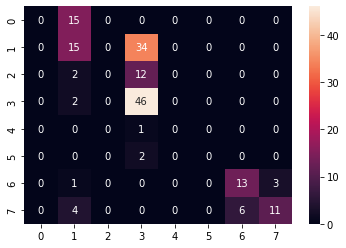

In [369]:
sns.heatmap(cf,annot=True)
print(classification_report(y_test,pred))

Cross validation of SVC

In [370]:
svc_scr=cross_val_score(svc,x,y,cv=5)
print(svc_scr)
svc_cv_scr=round(svc_scr.mean(),2)
print(round(svc_scr.std()),2)
print("The cv score for SVC:",svc_cv_scr)

[0.51497006 0.52095808 0.59281437 0.46385542 0.42771084]
0 2
The cv score for SVC: 0.5


Random Forest

In [371]:
from sklearn.ensemble import RandomForestClassifier

In [372]:
rf=RandomForestClassifier()

In [373]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [374]:
pred=rf.predict(x_test)
pred

array([7., 1., 1., 7., 3., 0., 6., 3., 0., 3., 3., 6., 7., 1., 1., 3., 6.,
       3., 6., 7., 7., 3., 7., 1., 1., 6., 3., 1., 3., 1., 3., 1., 1., 3.,
       3., 3., 7., 3., 6., 3., 1., 1., 3., 7., 1., 0., 3., 0., 1., 3., 3.,
       1., 3., 6., 3., 7., 3., 6., 1., 6., 1., 2., 1., 3., 1., 1., 1., 1.,
       2., 3., 2., 1., 1., 6., 1., 1., 1., 1., 3., 1., 3., 6., 3., 1., 6.,
       3., 1., 6., 7., 1., 1., 3., 1., 3., 1., 1., 3., 2., 3., 1., 1., 3.,
       7., 7., 0., 7., 0., 3., 7., 3., 3., 1., 1., 3., 1., 2., 3., 3., 1.,
       1., 1., 0., 0., 3., 6., 3., 3., 1., 7., 2., 3., 3., 1., 7., 7., 1.,
       5., 1., 1., 2., 3., 1., 1., 1., 7., 1., 2., 3., 3., 3., 1., 1., 1.,
       3., 1., 6., 7., 1., 7., 6., 3., 3., 3., 7., 6., 1., 1.])

In [375]:
acc_rf=round(accuracy_score(y_test,pred),2)
acc_rf

0.84

In [376]:
confusion_matrix(y_test,pred)
cf=confusion_matrix(y_test,pred)
cf

array([[ 8,  7,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  1,  4,  0,  0,  0,  0],
       [ 0,  3,  6,  5,  0,  0,  0,  0],
       [ 0,  5,  0, 43,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 21]], dtype=int64)

              precision    recall  f1-score   support

         0.0       1.00      0.53      0.70        15
         1.0       0.73      0.90      0.81        49
         2.0       0.75      0.43      0.55        14
         3.0       0.83      0.90      0.86        48
         4.0       0.00      0.00      0.00         1
         5.0       1.00      0.50      0.67         2
         6.0       1.00      1.00      1.00        17
         7.0       1.00      1.00      1.00        21

    accuracy                           0.84       167
   macro avg       0.79      0.66      0.70       167
weighted avg       0.85      0.84      0.83       167



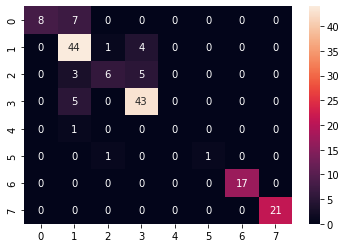

In [377]:
sns.heatmap(cf,annot=True)
print(classification_report(y_test,pred))

Cross validation of Random Forest

In [378]:
rf_scr=cross_val_score(rf,x,y,cv=5)
print(rf_scr)
rf_cv_scr=round(rf_scr.mean(),2)
print(round(rf_scr.std()),2)
print("The cv score for Random Forest:",rf_cv_scr)

[0.8502994  0.8502994  0.86227545 0.8253012  0.84337349]
0 2
The cv score for Random Forest: 0.85


COMPARING ALL MACHINE LEARNING MODELS

Creating a dataframe that will show the metrics of all the models

In [379]:
#Constructing a dataframe
models = pd.DataFrame({'ML_Model' : ['Logistic Regression','Gaussian Naive Bayes','Decision Tree Classifier','SVC','Random Forest'],'Accuracy_Score' : [acc_lr,acc_gb,acc_dtc,acc_svc,acc_rf],'Cross_Validation_Score':[lrcv_scr,gb_cv_scr,dtc_cv_scr,svc_cv_scr,rf_cv_scr] })
models

,ML_Model,Accuracy_Score,Cross_Validation_Score
0,Logistic Regression,0.57485,0.61
1,Gaussian Naive Bayes,0.61000,0.63
2,Decision Tree Classifier,0.80000,0.78
3,SVC,0.51000,0.50
4,Random Forest,0.84000,0.85


We will be taking Random Forest classifier as the best model as the accuracy score & Cross validation score is the best among the model.

Hyper Parameter tunning

In [380]:
from sklearn.model_selection import GridSearchCV

In [381]:
rf=RandomForestClassifier()

In [382]:
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5],
            'criterion' :['gini', 'entropy'],
            'n_estimators':[50,100]}

In [383]:
GSV=GridSearchCV(rf,parameters,cv=5)

In [384]:
GSV.fit(x_train,y_train)
GSV.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [385]:
GSV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=50)

In [386]:
GCV_pred=GSV.best_estimator_.predict(x_test)#predicting with the best parameter
accuracy_score(y_test,GCV_pred)#checking final accuracy

0.7724550898203593

Model Saving

In [387]:
import pickle

In [388]:
filename='ML_primary_fuel'
pickle.dump(rf,open(filename,'wb'))

Analysis with Target Variable-capacity_mw

In [389]:
pow.sample()

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel
54,54.0,29.0,60.0,24.1917,81.2875,2001.0,5.0,22.0,58.0,2.0,120.44475,39.6806,53.2126,68.456,84.8934,3.0


Moving Capacity MW which is our target variable to the end so that splitting data is possible.

In [390]:
pow['new_capacity_mw']= pow['capacity_mw']
pow

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel,new_capacity_mw
0,0.0,657.0,2.5,28.1839,73.2407,2011.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0,2.5
1,1.0,519.0,98.0,24.7663,74.6090,2001.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0,98.0
2,2.0,853.0,39.2,21.9038,69.3732,2001.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0,39.2
3,3.0,0.0,135.0,23.8712,91.3602,2004.0,5.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,2.0,135.0
4,4.0,1.0,1800.0,21.9603,82.4091,2015.0,5.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,1600.0,16.2949,77.3568,2016.0,5.0,22.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1.0,1600.0
903,903.0,822.0,3.0,12.8932,78.1654,2001.0,114.0,77.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0,3.0
904,904.0,891.0,25.5,15.2758,75.5811,2001.0,5.0,21.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0,25.5
905,905.0,539.0,80.0,24.3500,73.7477,2001.0,91.0,59.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0,80.0


In [391]:
pow.drop('capacity_mw',axis=1,inplace=True)
pow.head(2)

,name,gppd_idnr,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel,new_capacity_mw
0,0.0,657.0,28.1839,73.2407,2011.0,229.0,109.0,128.0,1.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,6.0,2.5
1,1.0,519.0,24.7663,74.6090,2001.0,258.0,174.0,173.0,2.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,1.0,98.0


In [392]:
pow.shape

(907, 16)

In [393]:
x=pow.drop(columns=['new_capacity_mw'])
y=pow['new_capacity_mw']

In [394]:
print(x.shape)
print(y.shape)

(907, 15)
(907,)


In [395]:
from sklearn.preprocessing import StandardScaler

In [396]:
scalar=StandardScaler()
x_Scaled = scalar.fit_transform(x)
x_Scaled

array([[-1.73014221e+00,  7.79136890e-01,  1.14469346e+00, ...,
        -1.55741196e-16,  1.50124402e-16,  1.22568762e+00],
       [-1.72632291e+00,  2.52073700e-01,  5.82323517e-01, ...,
        -1.55741196e-16,  1.50124402e-16, -9.67877242e-01],
       [-1.72250361e+00,  1.52771939e+00,  1.11295907e-01, ...,
        -1.55741196e-16,  1.50124402e-16,  1.66440059e+00],
       ...,
       [ 1.72250361e+00,  1.67285273e+00, -9.79348982e-01, ...,
        -1.55741196e-16,  1.50124402e-16,  1.66440059e+00],
       [ 1.72632291e+00,  3.28459669e-01,  5.13820882e-01, ...,
        -1.55741196e-16,  1.50124402e-16, -9.67877242e-01],
       [ 1.73014221e+00,  1.61556326e+00, -1.85828239e+00, ...,
        -1.55741196e-16,  1.50124402e-16,  1.66440059e+00]])

In [397]:
#checking the shape
x_Scaled.shape

(907, 15)

In [398]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [399]:
#creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [400]:
vif['vif']=[variance_inflation_factor(x_Scaled, i) for i in range(x_Scaled.shape[1])]

In [401]:
vif['Features'] = x.columns
vif

,vif,Features
0,1.390689,name
1,3.984879,gppd_idnr
2,1.114729,latitude
3,1.260340,longitude
4,1.173381,commissioning_year
5,3.786169,owner
6,3.976617,source
7,2.981769,url
8,3.250856,geolocation_source
9,11.177070,generation_gwh_2014


Checking out for Outliers using Zscore

In [402]:
import scipy.stats
from scipy.stats import zscore

In [403]:
z=np.abs(zscore(pow))
z

,name,gppd_idnr,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel,new_capacity_mw
0,1.730142,0.779137,1.144693,0.869917,0.933076,2.095328,1.460215,0.476673,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.225688,0.548908
1,1.726323,0.252074,0.582324,0.585590,0.172699,2.446913,2.917019,1.116401,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.967877,0.386977
2,1.722504,1.527719,0.111296,1.673567,0.172699,0.656734,0.512075,1.571318,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.664401,0.486679
3,1.718684,1.730142,0.435034,2.895239,0.400812,0.620363,0.489662,0.518459,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01,0.529164,0.324240
4,1.714865,1.726323,0.120593,1.035238,1.237227,0.620363,0.489662,0.518459,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00,0.967877,2.498942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.714865,0.145133,0.811655,0.014609,1.313265,0.620363,0.489662,0.518459,0.394241,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01,0.967877,2.159821
903,1.718684,1.409321,1.371409,0.153415,0.172699,0.701112,0.743019,1.030242,2.560940,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.225688,0.548060
904,1.722504,1.672853,0.979349,0.383592,0.172699,0.620363,0.512075,2.353208,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.664401,0.509909
905,1.726323,0.328460,0.513821,0.764564,0.172699,0.422268,0.339596,0.177271,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.967877,0.417498


In [404]:
#checking datashape of z
z.shape

(907, 16)

In [405]:
threshold =3
np.where(z>3)
len(np.where(z>3)[0])

150

In [406]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
pow_capacity_new=pow[(z<3).all(axis=1)]

#old Dataset
print("Old DataFrame",pow.shape)
#Dataset after removal of outliers
print("New DataFrame",pow_capacity_new.shape)
# total rows deleted
print("total_dropped_rows",pow.shape[0]-pow_capacity_new.shape[0])

Old DataFrame (907, 16)
New DataFrame (833, 16)
total_dropped_rows 74


In [407]:
#dataset after removignoutliers
pow_capacity_new

,name,gppd_idnr,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel,new_capacity_mw
0,0.0,657.0,28.1839,73.2407,2011.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0,2.5
1,1.0,519.0,24.7663,74.6090,2001.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0,98.0
2,2.0,853.0,21.9038,69.3732,2001.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0,39.2
3,3.0,0.0,23.8712,91.3602,2004.0,5.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,2.0,135.0
4,4.0,1.0,21.9603,82.4091,2015.0,5.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,16.2949,77.3568,2016.0,5.0,22.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1.0,1600.0
903,903.0,822.0,12.8932,78.1654,2001.0,114.0,77.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0,3.0
904,904.0,891.0,15.2758,75.5811,2001.0,5.0,21.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0,25.5
905,905.0,539.0,24.3500,73.7477,2001.0,91.0,59.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0,80.0


In [408]:
#Lets reset our data having removed outliers
pow_capacity_new.reset_index(inplace=True)
pow_capacity_new

,index,name,gppd_idnr,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel,new_capacity_mw
0,0,0.0,657.0,28.1839,73.2407,2011.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0,2.5
1,1,1.0,519.0,24.7663,74.6090,2001.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0,98.0
2,2,2.0,853.0,21.9038,69.3732,2001.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0,39.2
3,3,3.0,0.0,23.8712,91.3602,2004.0,5.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,2.0,135.0
4,4,4.0,1.0,21.9603,82.4091,2015.0,5.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,902,902.0,491.0,16.2949,77.3568,2016.0,5.0,22.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1.0,1600.0
829,903,903.0,822.0,12.8932,78.1654,2001.0,114.0,77.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0,3.0
830,904,904.0,891.0,15.2758,75.5811,2001.0,5.0,21.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0,25.5
831,905,905.0,539.0,24.3500,73.7477,2001.0,91.0,59.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0,80.0


In [409]:
#dropping the index columns which is not needed
pow_capacity_new.drop('index', axis=1,inplace=True)
pow_capacity_new

,name,gppd_idnr,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel,new_capacity_mw
0,0.0,657.0,28.1839,73.2407,2011.0,229.0,109.0,128.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0,2.5
1,1.0,519.0,24.7663,74.6090,2001.0,258.0,174.0,173.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0,98.0
2,2.0,853.0,21.9038,69.3732,2001.0,2.0,21.0,205.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0,39.2
3,3.0,0.0,23.8712,91.3602,2004.0,5.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,2.0,135.0
4,4.0,1.0,21.9603,82.4091,2015.0,5.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,902.0,491.0,16.2949,77.3568,2016.0,5.0,22.0,58.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1.0,1600.0
829,903.0,822.0,12.8932,78.1654,2001.0,114.0,77.0,22.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,6.0,3.0
830,904.0,891.0,15.2758,75.5811,2001.0,5.0,21.0,260.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.0,25.5
831,905.0,539.0,24.3500,73.7477,2001.0,91.0,59.0,82.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.0,80.0


Transforming Data to Remove Skewness using Power transformation

In [410]:
pow_capacity_new.skew()

name                   0.021476
gppd_idnr             -0.054302
latitude              -0.131075
longitude              0.936933
commissioning_year    -1.266675
owner                  1.320280
source                 1.782665
url                    1.430461
geolocation_source    -2.102192
generation_gwh_2014    1.523020
generation_gwh_2015    1.388494
generation_gwh_2016    1.411175
generation_gwh_2017    1.278034
generation_gwh_2018    1.315084
new_primary_fuel       0.411447
new_capacity_mw        1.950900
dtype: float64

From the above the some features are skewed based on a threshold of +/-0.8

In [411]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method ='yeo-johnson')

In [412]:
#extracting the columns that are skewed
data=['commissioning_year','owner','source','url','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [413]:
#Now removing skewness by Power Transformation a nd updating dataset(bdmtrain_new) with result
pow_capacity_new[data] = scaler.fit_transform(pow_capacity_new[data].values)
pow_capacity_new

,name,gppd_idnr,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,new_primary_fuel,new_capacity_mw
0,0.0,657.0,28.1839,73.2407,1.148978,1.476573,1.613712,0.721270,-2.279786,0.332872,0.362399,0.365805,0.366529,0.381706,6.0,2.5
1,1.0,519.0,24.7663,74.6090,0.004001,1.500483,2.087889,1.195402,0.404200,0.332872,0.362399,0.365805,0.366529,0.381706,1.0,98.0
2,2.0,853.0,21.9038,69.3732,0.004001,-1.854805,-0.468791,1.472193,0.404200,0.332872,0.362399,0.365805,0.366529,0.381706,7.0,39.2
3,3.0,0.0,23.8712,91.3602,0.320411,-0.738796,-0.400650,-0.424431,0.404200,-1.027947,-0.713853,-0.666527,-0.886415,-0.906368,2.0,135.0
4,4.0,1.0,21.9603,82.4091,1.685448,-0.738796,-0.400650,-0.424431,0.404200,0.666898,1.877512,1.913910,1.550530,2.096576,1.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,902.0,491.0,16.2949,77.3568,1.827386,-0.738796,-0.400650,-0.424431,0.404200,0.332872,-2.087281,-1.401279,-0.703339,-0.848318,1.0,1600.0
829,903.0,822.0,12.8932,78.1654,0.004001,1.303905,1.229535,-1.640890,-2.480423,0.332872,0.362399,0.365805,0.366529,0.381706,6.0,3.0
830,904.0,891.0,15.2758,75.5811,0.004001,-0.738796,-0.468791,1.871875,0.404200,0.332872,0.362399,0.365805,0.366529,0.381706,7.0,25.5
831,905.0,539.0,24.3500,73.7477,0.004001,1.233959,0.915820,0.059349,0.404200,0.332872,0.362399,0.365805,0.366529,0.381706,1.0,80.0


In [414]:
pow_capacity_new.skew()

name                   0.021476
gppd_idnr             -0.054302
latitude              -0.131075
longitude              0.936933
commissioning_year    -0.315826
owner                  0.437361
source                -0.178437
url                    0.064272
geolocation_source    -2.074065
generation_gwh_2014   -0.250359
generation_gwh_2015   -0.313329
generation_gwh_2016   -0.312876
generation_gwh_2017   -0.343626
generation_gwh_2018   -0.356983
new_primary_fuel       0.411447
new_capacity_mw        1.950900
dtype: float64

Most of the columns skewness has been brought down

In [415]:
x=pow_capacity_new.iloc[:,0:-1]
x.shape

(833, 15)

In [416]:
y=pow_capacity_new.iloc[:,-1]

In [417]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
828    1600.0
829       3.0
830      25.5
831      80.0
832      16.5
Name: new_capacity_mw, Length: 833, dtype: float64

In [418]:
y.shape

(833,)

MODEL BUILDING

Linear Regression

In [419]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [420]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [421]:
lr.fit(x_train,y_train)

LinearRegression()

In [422]:
lr.score(x_train,y_train)

0.5766368343226904

In [423]:
lr.coef_

array([   0.27259757,   -0.54078031,   -3.26965641,   -0.53798289,
         93.38128724, -148.04832584,    5.57470502,   12.60845449,
        -27.70385367,   12.37987694,  -25.26895181,   94.03487806,
         53.79282629,   91.12072262,  -26.10922862])

In [424]:
lr.intercept_

596.2273879538731

In [425]:
pred_y=lr.predict(x_test)
lr.score(x_test,y_test)

0.546984204729076

In [426]:
print("Predicted result:",pred_y)
print("Actual result:",y_test)

Predicted result: [ 499.69603763  549.16292044  295.53634726 -106.15727926  921.71829154
   72.28605231  133.60672623  -56.39767195  464.6051417   225.51939873
  983.79750658 -103.8655265   107.8132075   634.86039413  178.86675522
  249.21160901  420.19189544  203.7108413    16.88192237 -117.61286577
  688.26413311  608.78734434  480.41522822    7.69140654  -89.72558188
  -86.41902801  118.56166745  135.7956998   470.93444643  501.64097917
  -90.71673994  -80.77307608  593.22870054  -64.04494492 -144.51797465
  554.58985897  -10.16701248  557.37860714  242.3190222  1086.97762604
 -161.35987775  103.07316198  315.05846012  -45.29325488  -11.27924029
  481.57733817  350.50494497  701.05065699  -24.74178384  197.85670386
  483.76403878  387.03153282  201.12870633  229.30554263   93.53173842
  528.17656357  212.20168876  -15.01843438  132.62902773  804.24349748
 -101.43004238  242.87453819  287.06987508  119.39122058  -82.43326271
  255.70449609  128.96264604  -71.63233032  105.6163718   2

In [427]:
print('error:')
print("Mean Absolute error:",mean_absolute_error(pred_y,y_test))
print("Mean squared error:",mean_squared_error(y_test,pred_y))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_y)))

error:
Mean Absolute error: 193.0915857653692
Mean squared error: 76538.6692880901
Root Mean Squared Error: 276.65622944023886


In [428]:
test_acc=(r2_score(y_test,pred_y))
test_acc

0.546984204729076

Checking for overfitting in Linear Regression model.

In [429]:
scr=cross_val_score(lr,x,y,cv=5)
print(scr)
cv_scr=scr.mean()
print('The Cv score for K 5 fold is:',cv_scr)
print(round(scr.std()),2)



[0.47970961 0.57522838 0.52370136 0.60992525 0.47069009]
The Cv score for K 5 fold is: 0.5318509377700016
0 2


 KNeighbors Regressor

In [430]:

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [431]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [432]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [433]:
knn.score(x_train,y_train)

0.4048616028163461

In [434]:
predict_x=knn.predict(x_test)
predict_x

array([  16.88  ,   55.24  ,  239.52  ,  186.4   ,  500.4142,  452.64  ,
        188.78  ,   68.32  ,  189.    ,   34.74  ,  187.1   ,   15.9   ,
         62.26  ,   13.8   ,  612.9   ,   19.3   ,   21.94  ,    9.7   ,
        173.9142,   19.3   ,    5.    ,   21.85  ,   19.6   ,  432.    ,
          5.    ,   21.94  ,  306.24  ,   57.64  , 1274.    ,  425.4   ,
        365.46  ,  225.5   ,   19.51  ,  228.9   ,   34.74  ,   17.36  ,
        495.98  ,  406.6   ,  576.2   ,  462.    ,  368.    ,    3.56  ,
        134.44  ,   78.1   ,  620.27  ,   31.7   ,   34.74  ,   10.7   ,
         41.46  ,    3.56  ,   61.34  ,   32.24  ,  507.    ,    5.57  ,
          5.    ,  240.4   ,   19.6   ,  574.    ,  254.9   , 1045.1348,
         55.24  ,  269.8   ,   56.16  ,  430.8   ,  395.7   ,   38.14  ,
        200.4   ,  525.    ,   19.3   ,  142.2   ,  110.1   ,  299.72  ,
         39.27  ,    8.4   ,  303.714 ,  879.956 ,  414.92  ,  235.    ,
        692.12  ,  522.3   ,  734.    ,   19.94  , 

In [435]:
knn_acc_test=round(r2_score(y_test,predict_x),3)
print("Accuracy test score for KNN:", knn_acc_test)                
print("Mean Absolute error:",mean_absolute_error(y_test,predict_x))
print("Mean Squared error:", mean_squared_error(y_test,predict_x))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,predict_x)))

Accuracy test score for KNN: 0.37
Mean Absolute error: 211.63275329341315
Mean Squared error: 116384.97994445487
Root Mean Squared error: 341.15242919324913


Checking Cross Validation score 

In [436]:
scr=cross_val_score(knn,x,y,cv=5)
print(scr)
print(scr.std())
cv_knn=round(scr.mean(),3)
print('The CV score of Knn:',cv_knn)

[ 0.12357815 -0.26675263  0.15216728  0.15611508  0.17870444]
0.168670816313113
The CV score of Knn: 0.069


SGDRegressor

In [437]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(alpha=0.0001)

In [438]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [439]:
sgd.fit(x_train,y_train)


SGDRegressor()

In [440]:
score=sgd.score(x_train,y_train)


In [441]:
predict_y=sgd.predict(x_test)



In [442]:
score_t=sgd.score(x_test,y_test)
score_t

-9.538336492424965e+23

In [443]:
sgd_acc_test=round(r2_score(y_test,predict_y),3)
print("Accuracy test score for sgd:", sgd_acc_test)                
print("Mean Absolute error:",mean_absolute_error(y_test,predict_y))
print("Mean Squared error:", mean_squared_error(y_test,predict_y))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,predict_y)))

Accuracy test score for sgd: -9.538336492424965e+23
Mean Absolute error: 351212103963503.44
Mean Squared error: 1.594543786877743e+29
Root Mean Squared error: 399317390915765.56


Checking Cross Validation score of SGDRegressor

In [444]:
sgd_sc=cross_val_score(sgd, x,y,cv=5)

print(sgd_sc)
print(sgd_sc.std())
cv_sgd=round(sgd_sc.mean(),3)
print('The CV score of SGD:',cv_sgd)

[-2.67359124e+21 -1.99927889e+23 -2.55021611e+23 -7.69884867e+22
 -1.68968677e+22]
1.0039397279420226e+23
The CV score of SGD: -1.1030168894165895e+23


In [445]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [450]:
#Lasso Regulatisation Method
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
print("The train score is:",ls.score(x_train,y_train))
pred_y=ls.predict(x_test)

print("Predicted result:",pred_y)
print("Actual result:",y_test)
ls_score=ls.score(x_test,y_test)
print('The Test score is:',ls_score)

print("The coefficient values are:",ls.coef_)
print('The intercept values are:',ls.intercept_)

print('error:')
print("Mean Absolute error:",mean_absolute_error(pred_y,y_test))
print("Mean squared error:",mean_squared_error(y_test,pred_y))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_y)))

scr=cross_val_score(ls,x,y,cv=5)
print(scr)
cv_score=scr.mean()
print('The Cv score for K 5 fold is:',cv_score)
print(round(scr.std()),2)



The train score is: 0.5653562868611666
Predicted result: [ -71.49465618  416.60897759   77.09184472  365.45602829  299.96709506
  477.54374196  600.61634831   38.22475125  714.60977003  444.33424599
  344.33330584  284.40299047  -70.68175996  309.53877819  -27.28074182
  -69.8243516   226.19380114 -102.02791227  240.28868676  703.49306168
  162.02046443  223.713027    179.4138864   344.5427685   231.92543078
  -93.72205035  152.14060583  286.77602624  241.91511179   17.34401017
  194.86721677  444.65132336  154.57470745  782.4710606    -8.35086929
  962.08402984  291.50505437  321.24272306  177.60818687  694.33247287
  206.47960211   94.87472182  784.59617466  949.35176468  268.48773843
  334.8923221   884.21931027  776.988628    474.63685661  217.48088507
  323.78478034  533.15876464  131.37775588  686.80355618   48.198638
  346.5902472   -99.28490252   81.520521    198.83951163 1199.69343141
  200.89748409   84.3715792   -85.7023341  -145.39845957  405.34048866
  102.97606445  100.91

GradientBoostingRegressor

In [453]:
from sklearn.ensemble import GradientBoostingRegressor

In [454]:
gb=GradientBoostingRegressor()

In [455]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [457]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [458]:
#training score
gb.score(x_train,y_train)

0.916500463070493

In [459]:
predict_y=gb.predict(x_test)

In [460]:
#testing score
gb_acc_test=r2_score(y_test,predict_y)
print("Accuracy test score for GB:", gb_acc_test)                
print("Mean Absolute error:",mean_absolute_error(y_test,predict_y))
print("Mean Squared error:", mean_squared_error(y_test,predict_y))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,predict_y)))

Accuracy test score for GB: 0.9118418622453381
Mean Absolute error: 61.277644735875406
Mean Squared error: 14399.655550474758
Root Mean Squared error: 119.99856478506214


Checking Cross Validation score of GradientBoostingRegressor

In [461]:
gb_sc=cross_val_score(gb, x,y,cv=5)

print(gb_sc)
print(gb_sc.std())
cv_gb=gb_sc.mean()
print('The CV score of SGD:',cv_gb)

[0.74937348 0.83579527 0.68504092 0.78046817 0.73381583]
0.050066308291238266
The CV score of SGD: 0.7568987346064533


COMPARING ALL MACHINE LEARNING MODELS

In [463]:
#Constructing a dataframe
models = pd.DataFrame({'ML_Model' : ['Linear Regression','Kneighbors Regressor','SGDRegressor','Lasso Regression','Gradient Boosting Regressor'],'Accuracy_Score' : [test_acc,knn_acc_test,sgd_acc_test,ls_score,gb_acc_test],'Cross_Validation_Score':[cv_scr,cv_knn,cv_sgd,cv_score,cv_gb]})
models

,ML_Model,Accuracy_Score,Cross_Validation_Score
0,Linear Regression,5.469842e-01,5.318509e-01
1,Kneighbors Regressor,3.700000e-01,6.900000e-02
2,SGDRegressor,-9.538336e+23,-1.103017e+23
3,Lasso Regression,6.027691e-01,5.318668e-01
4,Gradient Boosting Regressor,9.118419e-01,7.568987e-01


We will select Gradient Boosting Regressor Model as it gives the best Accuracy score & Best CV score.

HYPERPARAMETER TUNNING

In [464]:
from sklearn.model_selection import GridSearchCV

In [465]:
gb=GradientBoostingRegressor()

In [474]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [475]:
param_grid = {'max_depth':range(4,8),'min_samples_split':range(2,8,2),'learning_rate':np.arange(0.1,0.3),'n_estimators': [10,50,100]}

In [476]:
#Gridsearch
gridsearch = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')
gridsearch.fit(x_train, y_train);

In [477]:
#Get best hyperparameters
gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

In [478]:
gridsearch.best_estimator_

GradientBoostingRegressor(max_depth=4, n_estimators=10)

In [479]:
pred_test=gb.predict(x_test)

In [481]:
from sklearn.metrics import r2_score

In [483]:
r2_score(y_test,pred_test)

0.8251717613174843

MODEL SAVING

In [485]:
import pickle

In [486]:
filename='ML_Model_Project_Global_Power_Plant_capacity'
pickle.dump(gb,open(filename,'wb'))